In [3]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import admin_functions as adfn
import plot as pltfn
from kuramoto1 import Kuramoto
from scipy import stats 

sns.reset_orig()
#plt.style.use('dark_background')

%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [12]:
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
bln_1 = sorted(glob.glob('*BLN*0.650bin0.06nnbav.npy*'))
p5_1 = sorted(glob.glob('*_PTZ05*0.650bin0.06nnbav.npy*'))
p20_1 = sorted(glob.glob('*_PTZ20*0.650bin0.06nnbav.npy*'))
bln_2 = sorted(glob.glob('*BLN*0.630bin0.14nnbav.npy*')) 
p5_2 = sorted(glob.glob('*_PTZ05*0.630bin0.14nnbav.npy*'))
p20_2 = sorted(glob.glob('*_PTZ20*0.630bin0.14nnbav.npy*'))
bln_o = sorted(glob.glob('*BLN*0.550bin0.10nnbav.npy*'))
p5_o = sorted(glob.glob('*_PTZ05*0.550bin0.10nnbav.npy*'))
p20_o = sorted(glob.glob('*_PTZ20*0.550bin0.10nnbav.npy*'))

In [489]:
for c in range(len(bln_1)):
    b, p5, p20 = np.load(bln_1[c])[0],np.load(p5_1[c])[0],np.load(p20_1[c])[0]
    print(str(c) + '  baseline = ' + str(np.sum(b)) + ' cells' + ', ' + str(len(b)) + ' avalanches  , ' + str(np.max(b)) + ' largest av')
    print('p5 = ' + str(np.sum(p5)) + ' cells' + ', ' + str(len(p5)) + ' avalanches  , ' + str(np.max(p5)) + ' largest av')
    print('p20 = ' + str(np.sum(p20))+ ' cells' + ', ' + str(len(p20)) + ' avalanches  , ' + str(np.max(p20)) + ' largest av')
    print()

0  baseline = 3979907 cells, 283221 avalanches  , 470160 largest av
p5 = 6155569 cells, 303656 avalanches  , 2456896 largest av
p20 = 5356168 cells, 236685 avalanches  , 2446210 largest av
1  baseline = 13398264 cells, 183203 avalanches  , 11766091 largest av
p5 = 13072915 cells, 211831 avalanches  , 10931057 largest av
p20 = 7931010 cells, 377667 avalanches  , 1074789 largest av
2  baseline = 6447668 cells, 260296 avalanches  , 3470057 largest av
p5 = 5527658 cells, 267255 avalanches  , 1488822 largest av
p20 = 3570601 cells, 234203 avalanches  , 1092077 largest av
3  baseline = 6014875 cells, 321810 avalanches  , 2564722 largest av
p5 = 7862387 cells, 304247 avalanches  , 4313194 largest av
p20 = 7339531 cells, 281889 avalanches  , 4555498 largest av
4  baseline = 3207030 cells, 250665 avalanches  , 32028 largest av
p5 = 6658643 cells, 223775 avalanches  , 3852132 largest av
p20 = 6156727 cells, 229653 avalanches  , 3957612 largest av
5  baseline = 1587731 cells, 186868 avalanches  ,

In [488]:
for c in range(len(bln_2)):
    b, p5, p20 = np.load(bln_2[c])[0],np.load(p5_2[c])[0],np.load(p20_2[c])[0]
    print(str(c) + '  baseline = ' + str(np.sum(b)) + ' cells' + ', ' + str(len(b)) + ' avalanches  , ' + str(np.max(b)) + ' largest av')
    print('p5 = ' + str(np.sum(p5)) + ' cells' + ', ' + str(len(p5)) + ' avalanches  , ' + str(np.max(p5)) + ' largest av')
    print('p20 = ' + str(np.sum(p20))+ ' cells' + ', ' + str(len(p20)) + ' avalanches  , ' + str(np.max(p20)) + ' largest av')

0  baseline = 2209111 cells, 150373 avalanches  , 565083 largest av
p5 = 3842198 cells, 114223 avalanches  , 2821304 largest av
p20 = 3744657 cells, 87918 avalanches  , 3018527 largest av
1  baseline = 8599147 cells, 53450 avalanches  , 8242503 largest av
p5 = 9167784 cells, 45949 avalanches  , 8841905 largest av
p20 = 6110709 cells, 93152 avalanches  , 5435205 largest av
2  baseline = 3553681 cells, 109663 avalanches  , 2716801 largest av
p5 = 3411373 cells, 113240 avalanches  , 2329725 largest av
p20 = 2638711 cells, 94186 avalanches  , 1201234 largest av
3  baseline = 3326034 cells, 140071 avalanches  , 2405746 largest av
p5 = 4119476 cells, 139322 avalanches  , 3075444 largest av
p20 = 4832339 cells, 96812 avalanches  , 4117847 largest av
4  baseline = 1416758 cells, 129599 avalanches  , 31433 largest av
p5 = 3995777 cells, 86576 avalanches  , 3316311 largest av
p20 = 3733844 cells, 105031 avalanches  , 3004078 largest av
5  baseline = 792859 cells, 94521 avalanches  , 1889 largest

In [7]:
os.chdir(Fdrop + 'Project/' + experiment)
blnli1 = sorted(glob.glob('*BLN*0.570bin0.10nnbav.npy*')) 
blnli2 = sorted(glob.glob('*BLN*0.590bin0.10nnbav.npy*')) 
p5li1 = sorted(glob.glob('*_PTZ05*0.570bin0.10nnbav.npy*')) 
p5li2 = sorted(glob.glob('*_PTZ05*0.590bin0.10nnbav.npy*')) 
p20li1 = sorted(glob.glob('*_PTZ20*0.570bin0.10nnbav.npy*')) 
p20li2 = sorted(glob.glob('*_PTZ20*0.590bin0.10nnbav.npy*')) 
p20li2

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_0.590bin0.10nnbav.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_0.590bin0.10nnbav.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_0.590bin0.10nnbav.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_0.590bin0.10nnbav.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_0.590bin0.10nnbav.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_0.590bin0.10nnbav.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_0.590bin0.10nnbav.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_0.590bin0.10nnbav.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_0.590bin0.10nnbav.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_0.590bin0.10nnbav.npy']

In [440]:
for i in range(11):
    namelist = bln_1, p5_1, p20_1
    sizeb, sizep5, sizep20 = np.load(bln_1[i])[0],np.load(p5_1[i])[0],np.load(p20_1[i])[0]
    durb, durp5, durp20 = np.load(bln_1[i])[1],np.load(p5_1[i])[1],np.load(p20_1[i])[1]
    sizelist = [sizeb, sizep5, sizep20]
    durlist = [durb, durp5, durp20]
    newsizelist, newdurlist = list(range(len(durlist))),list(range(len(durlist)))
    for e in range(len(durlist)):
        if len(np.where(durlist[e] == 4913)[0]) >0:
            newdurlist[e] = np.delete(durlist[e], np.where(durlist[e] == 4913)[0][0], 0)
            newsizelist[e] = np.delete(sizelist[e], np.where(durlist[e] == 4913)[0][0], 0)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(i, bln_1) + '_0.650bin0.06nnbav1.npy', np.vstack((newsizelist[0], newdurlist[0])))
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(i, p5_1) +  '_0.650bin0.06nnbav1.npy', np.vstack((newsizelist[1], newdurlist[1])))
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(i, p20_1) + '_0.650bin0.06nnbav1.npy', np.vstack((newsizelist[2], newdurlist[2])))

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


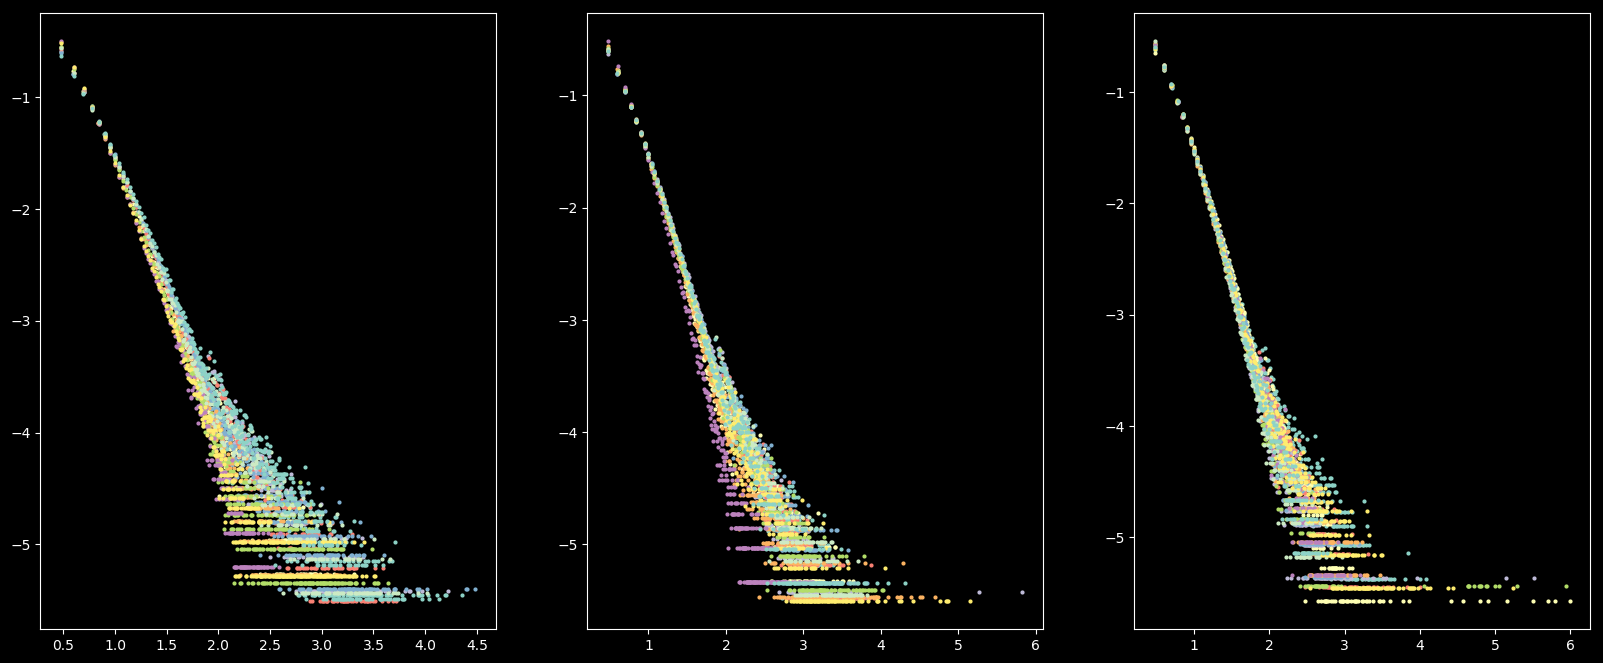

In [56]:
f, axarr = plt.subplots(1,3, figsize = (20,8))
colors = plt.cm.RdYlGn(np.linspace(0,1,5))
for t in range(0,3):
    avlist = (bln_1, p5_1, p20_1)
    for i in range(len(bln_1)):
        avdistcut = np.load(avlist[t][i])[0]
        mini = np.min(avdistcut)
        maxi = np.max(avdistcut)
        binned=np.logspace(np.log10(mini),np.log10(maxi), 1000)
        hist = np.histogram(avdistcut, bins = binned)
        xaxis = np.log10(hist[1][:-1])
        yaxis = np.log10(hist[0]/np.sum(hist[0]))
        axarr[t].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 2)
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


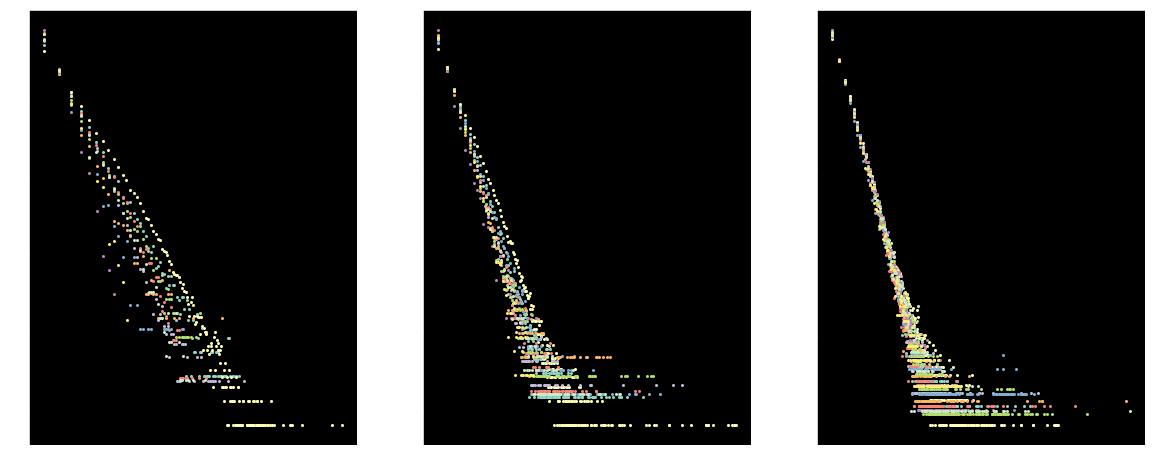

In [15]:
f, axarr = plt.subplots(1,3, figsize = (20,8))
colors = plt.cm.RdYlGn(np.linspace(0,1,5))
for t in range(0,3):
    avlist = (blnli1, p5li1, p20li1)
    for i in range(len(blnli1[:10])):
        avdistcut = np.load(avlist[t][i])[0]
        mini = np.min(avdistcut)
        maxi = np.max(avdistcut)
        binned=np.logspace(np.log10(mini),np.log10(maxi), 1000)
        hist = np.histogram(avdistcut, bins = binned)
        xaxis = np.log10(hist[1][:-1])
        yaxis = np.log10(hist[0]/np.sum(hist[0]))
        axarr[t].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 2)
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


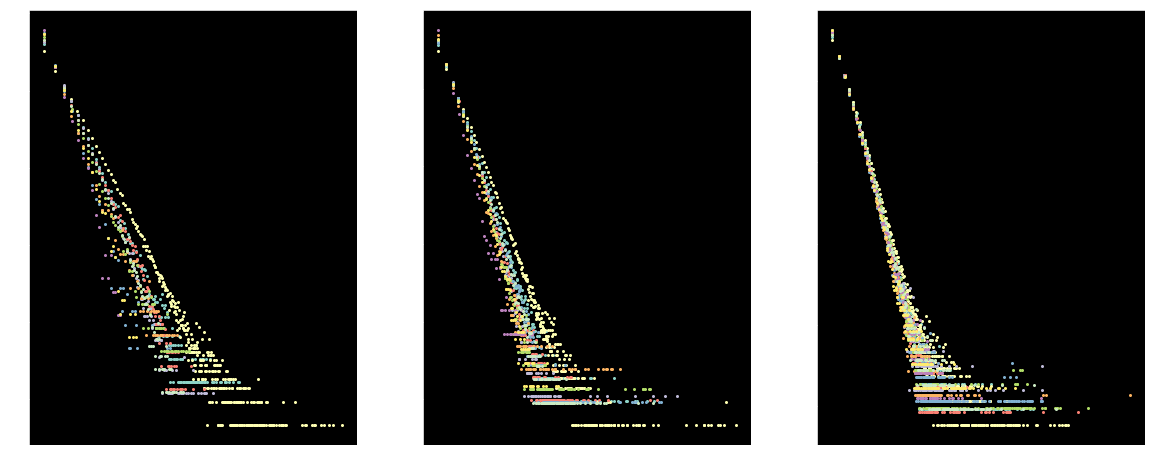

In [16]:
f, axarr = plt.subplots(1,3, figsize = (20,8))
colors = plt.cm.RdYlGn(np.linspace(0,1,5))
for t in range(0,3):
    avlist = (blnli2, p5li2, p20li2)
    for i in range(len(blnli1[:10])):
        avdistcut = np.load(avlist[t][i])[0]
        mini = np.min(avdistcut)
        maxi = np.max(avdistcut)
        binned=np.logspace(np.log10(mini),np.log10(maxi), 1000)
        hist = np.histogram(avdistcut, bins = binned)
        xaxis = np.log10(hist[1][:-1])
        yaxis = np.log10(hist[0]/np.sum(hist[0]))
        axarr[t].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 2)
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/core/function_base.py:117: RuntimeWarning: invalid value encountered in double_scalars
  delta = stop - start
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:367: RuntimeWarning: invalid value encountered in greater
  if np.any(bin_edges[:-1] > bin_edges[1:]):
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


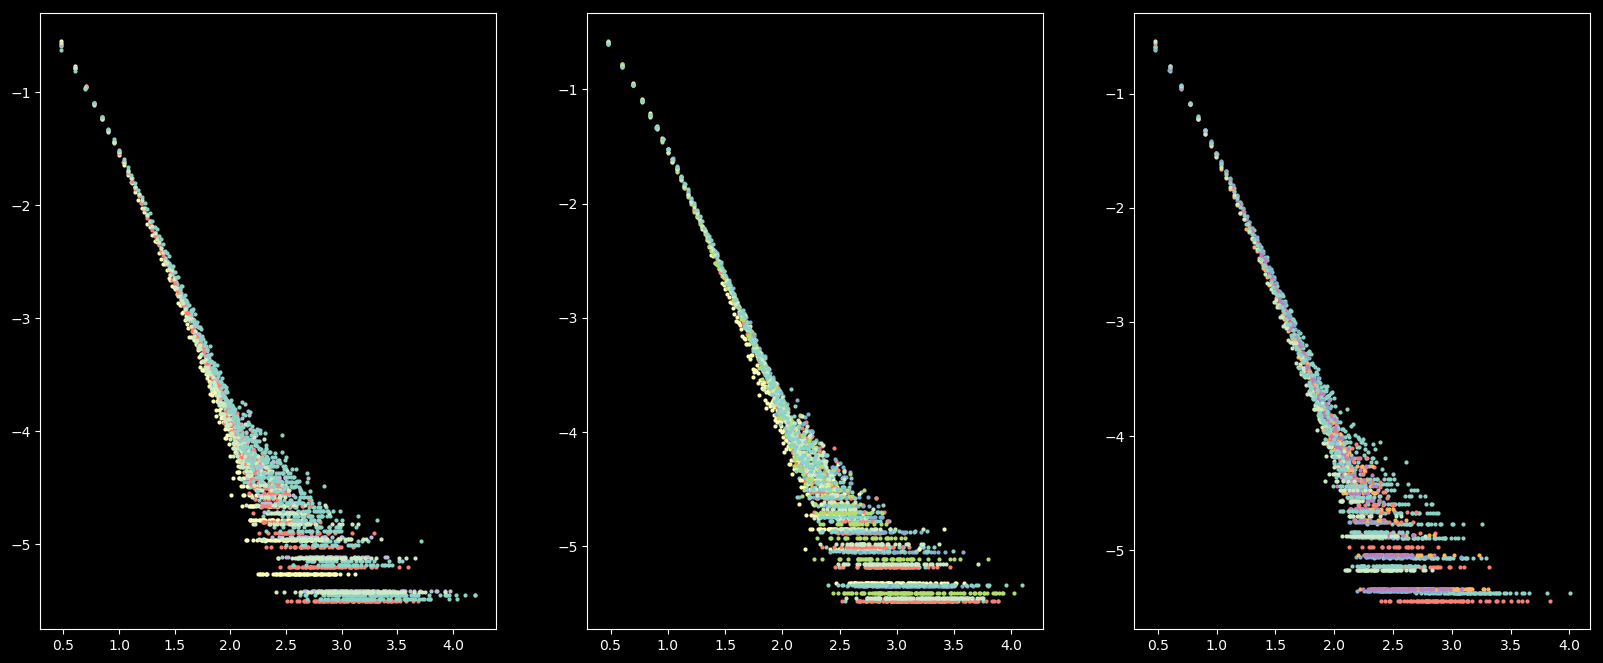

In [463]:
f, axarr = plt.subplots(1,3, figsize = (20,8))
colors = plt.cm.RdYlGn(np.linspace(0,1,5))
for t in range(0,3):
    avlist = (newbln_1, newp5_1, newp20_1)
    for i in range(len(bln_1)):
        avdistcut = np.load(avlist[t][i])[0]
        mini = np.min(avdistcut)
        maxi = np.max(avdistcut)
        binned=np.logspace(np.log10(mini),np.log10(maxi), 1000)
        hist = np.histogram(avdistcut, bins = binned)
        xaxis = np.log10(hist[1][:-1])
        yaxis = np.log10(hist[0]/np.sum(hist[0]))
        axarr[t].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 2)
plt.show()

In [ ]:
# PLOT - average whole brain fluorescence
#----------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
deltalist = sorted(glob.glob('*E-02*_deltaff.npy'))
f, axarr = plt.subplots(3,1,sharey=False, sharex=False, figsize = (20,5))
f.subplots_adjust(hspace=0)
for i in range(len(deltalist)):
    axarr[i].set_title(deltalist[i][deltalist[i].find('dpf')+4:deltalist[i].find('run')-1] + ' ' + str(np.load(deltalist[i]).shape[1]), size = 10)
    axarr[i].plot(np.apply_along_axis(np.mean, 0, np.load(deltalist[i])))
plt.show()

In [25]:
blnli = sorted(glob.glob('*BLN*0.55*0.1*av.npy'))[:10]
p5li = sorted(glob.glob('*_PTZ05*0.55*0.1*av.npy'))
p20li = sorted(glob.glob('*_PTZ20*0.55*0.1*av.npy'))
blnli

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.550bin0.10nnbav.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_0.550bin0.10nnbav.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_0.550bin0.10nnbav.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_0.550bin0.10nnbav.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_0.550bin0.10nnbav.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_0.550bin0.10nnbav.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_0.550bin0.10nnbav.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_0.550bin0.10nnbav.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_0.550bin0.10nnbav.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_0.550bin0.10nnbav.npy']

In [28]:
np.load(blnli[0])

array([[ 7, 11,  4, ...,  3,  4,  4],
       [ 3,  4,  2, ...,  2,  2,  1]])

In [ ]:
#==========================================================================
def powerfit(Fdrop, experiment, data):
#==========================================================================
    import os
    import numpy as np
    import glob
    import powerlaw
    cutoff = 3
    param = np.zeros((4))
    maxi = np.max(np.unique(data, return_counts = True)[0][np.unique(data, return_counts = True)[1] > cutoff]) 
    fit = powerlaw.Fit(data, discrete = True, xmax = maxi) #fit power law to data - MLE    
    alpha = fit.power_law.alpha
    sigma = fit.power_law.sigma
    R, p = fit.distribution_compare('truncated_power_law', 'lognormal', normalized_ratio=True)
    param[0],param[1] = R,p
    param[2],param[3]= alpha, sigma
    return(param)

p20avlist = list(range(len(p20li)))
for i in range(len(p20li)):
    p20avlist[i] = powerfit(Fdrop, experiment, np.load(p20li[i])[0])

Calculating best minimal value for power law fit
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/powerlaw.py:1185: RuntimeWarning: divide by zero encountered in double_scalars
  C = 1.0/C
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:597: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


In [32]:
bavlist

[array([1.50794654, 0.13156821, 3.20687695, 0.02781508]),
 array([2.26026069, 0.02380508, 3.5520986 , 0.04950168]),
 array([0.78375348, 0.43318478, 3.62356527, 0.12988584]),
 array([1.08204505, 0.27923251, 5.02409195, 0.21034266]),
 array([0.72729354, 0.46704616, 4.00498285, 0.25306521]),
 array([1.25257933, 0.21035884, 3.34258783, 0.1009024 ]),
 array([-0.38450203,  0.70060639,  4.12393218,  0.26496847]),
 array([-2.19360637,  0.02826372,  5.50346394,  0.23702442]),
 array([-0.2211492 ,  0.82497626,  4.48636461,  0.11148165]),
 array([-0.88508745,  0.37610947,  6.02465481,  0.64868015])]

In [36]:
bavlist

[array([2.04676434, 0.04068123, 3.20687695, 0.02781508]),
 array([0.8334115 , 0.40461269, 3.5520986 , 0.04950168]),
 array([0.84339134, 0.39900961, 3.62356527, 0.12988584]),
 array([-0.99435327,  0.32005091,  5.02409195,  0.21034266]),
 array([-0.98560794,  0.32432554,  4.00498285,  0.25306521]),
 array([0.6336183 , 0.52632995, 3.34258783, 0.1009024 ]),
 array([0.86836044, 0.38519705, 4.12393218, 0.26496847]),
 array([-0.76906978,  0.44185189,  5.50346394,  0.23702442]),
 array([2.27176042, 0.02310098, 4.48636461, 0.11148165]),
 array([1.41392111, 0.15738507, 6.02465481, 0.64868015])]

In [33]:
p20avlist

[array([4.52956725e+00, 5.91046208e-06, 2.92694937e+00, 1.48623145e-02]),
 array([1.74781251e+01, 2.10300800e-68, 2.60758170e+00, 7.32879895e-03]),
 array([4.03281100e+00, 5.51136055e-05, 2.80950757e+00, 1.99389478e-02]),
 array([5.98076948e+00, 2.22085979e-09, 2.92071560e+00, 1.53514852e-02]),
 array([1.13393150e+01, 8.37977594e-30, 2.72616887e+00, 1.70507126e-02]),
 array([3.72581357e+00, 1.94686258e-04, 2.79811850e+00, 1.69906228e-02]),
 array([1.15171986e+01, 1.08067512e-30, 2.69205846e+00, 1.02620640e-02]),
 array([3.91285105e+00, 9.12127989e-05, 2.62777420e+00, 9.00409041e-03]),
 array([4.64753514e+00, 3.35924876e-06, 2.73655550e+00, 1.62273648e-02]),
 array([2.77114329, 0.00558598, 2.88753056, 0.02700056])]

In [ ]:
p20avlist

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


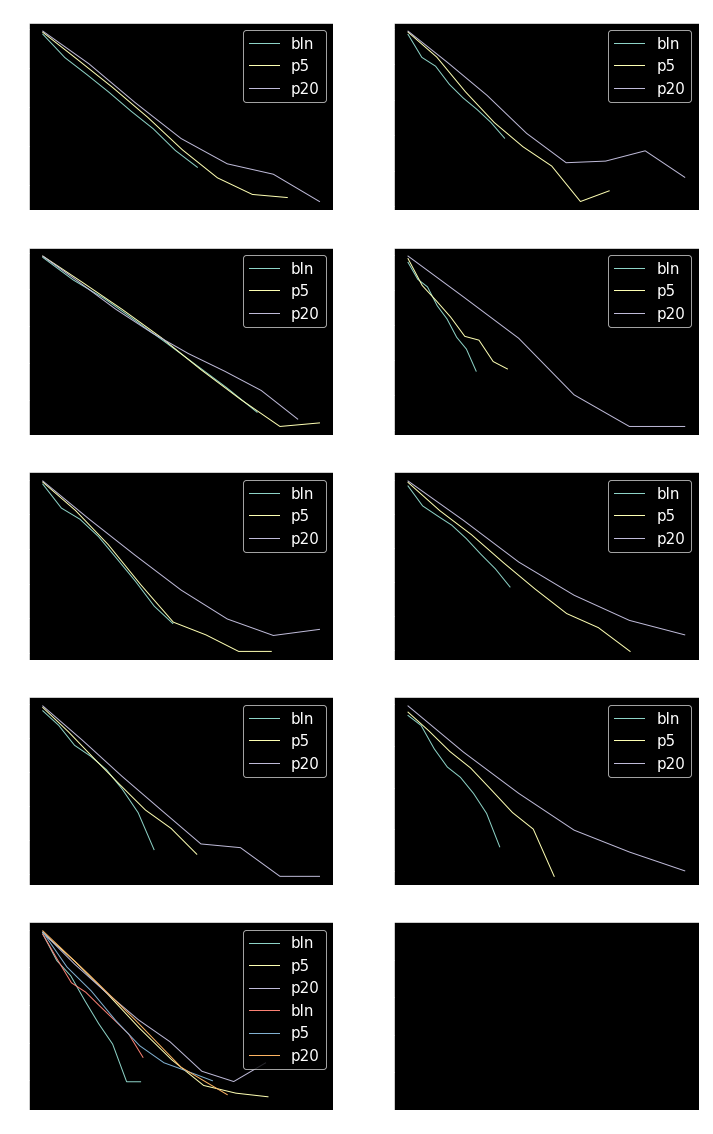

In [20]:
#powerlaw vs lognorm
#-----------------------------------
f, axarr = plt.subplots(5,2, figsize = (12,20))
o,e = 0,0
avlist = (blnli2, p5li2, p20li2)
ok =['bln', 'p5', 'p20']
for f in range(0,10):
    for t in range(0,3):
        avdistcut = np.load(avlist[t][f])[0]
        mini = np.min(avdistcut)
        maxi = np.max(avdistcut)
        binned=np.logspace(np.log10(mini),np.log10(maxi), 10)
        hist = np.histogram(avdistcut, bins = binned)
        xaxis = np.log10(hist[1][:-1])
        yaxis = np.log10(hist[0]/np.sum(hist[0]))
        axarr[o,e].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1, markersize = 1, label = str(ok[t]))  
        axarr[o,e].legend(loc = 1, markerscale = 2,prop={'size': 15})
        axarr[o,e].set_title(str(f + 2))
    if f < 4:o+=1
    if f == 5:
        o = 0
        e=1
    if f>5:o+=1
    if f == 10:
        break
plt.show()


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


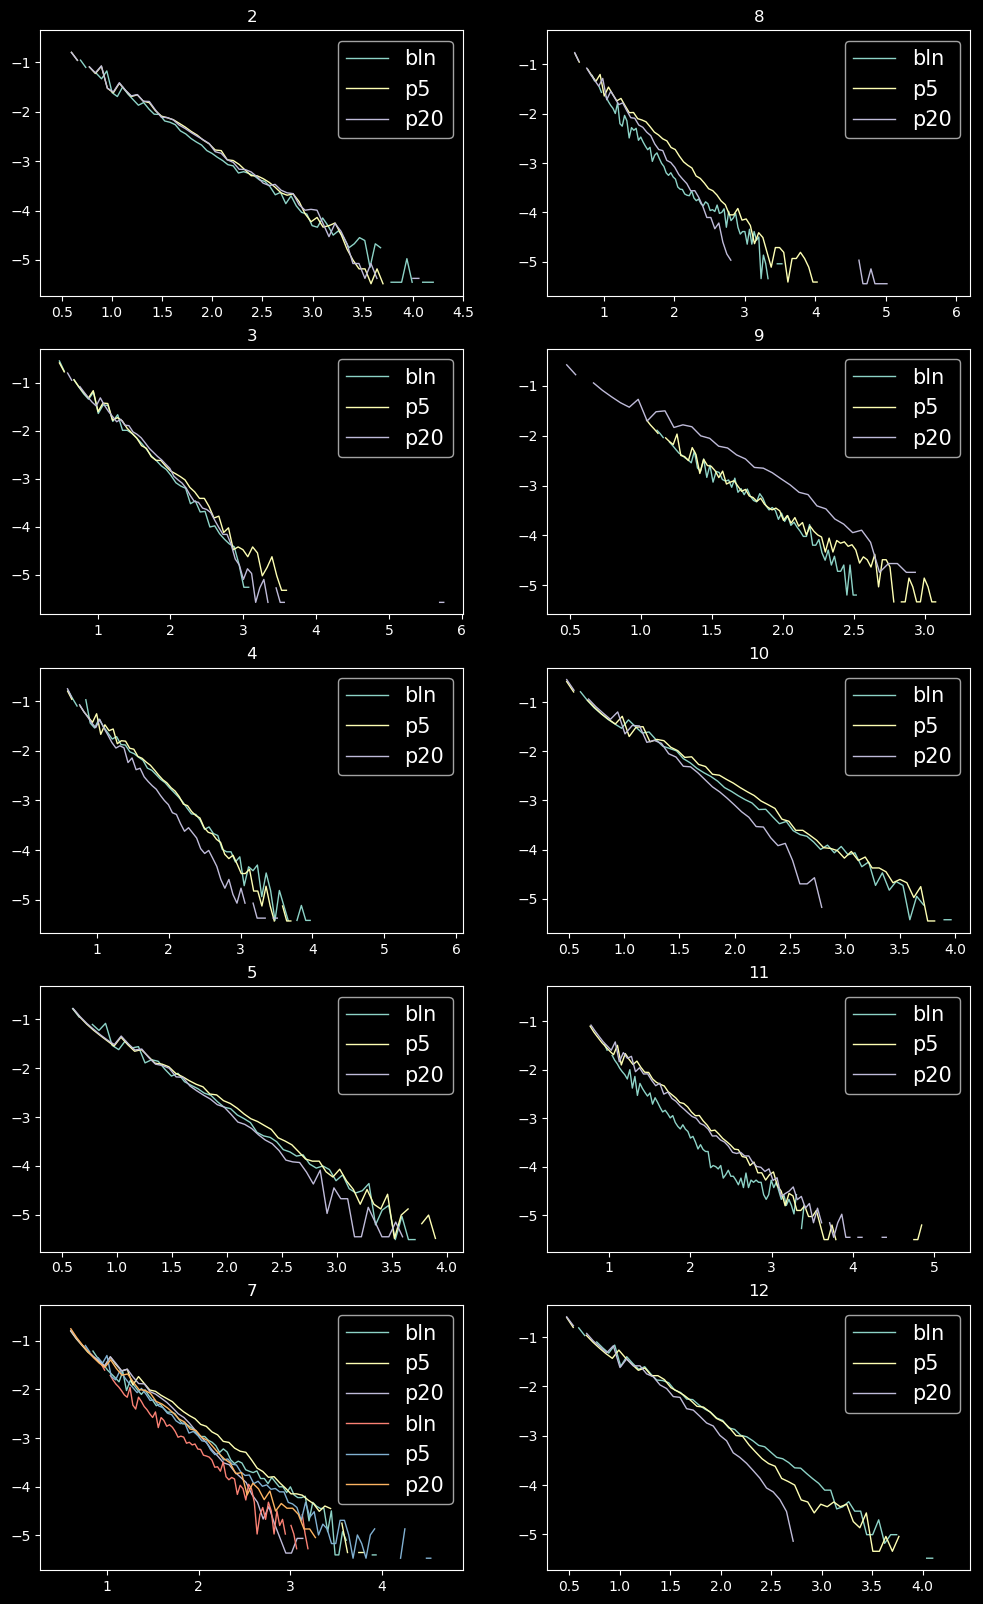

In [183]:
#powerlaw vs lognorm
#-----------------------------------
f, axarr = plt.subplots(5,2, figsize = (12,20))
o,e = 0,0
avlist = (bln_1, p5_1, p20_1)
ok =['bln', 'p5', 'p20']
for f in range(0,11):
    for t in range(0,3):
        avdistcut = np.load(avlist[t][f])[0]
        mini = np.min(avdistcut)
        maxi = np.max(avdistcut)
        binned=np.logspace(np.log10(mini),np.log10(maxi), 100)
        hist = np.histogram(avdistcut, bins = binned)
        xaxis = np.log10(hist[1][:-1])
        yaxis = np.log10(hist[0]/np.sum(hist[0]))
        axarr[o,e].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1, markersize = 1, label = str(ok[t]))  
        axarr[o,e].legend(loc = 1, markerscale = 2,prop={'size': 15})
        axarr[o,e].set_title(str(f + 2))
    if f < 4:o+=1
    if f == 5:
        o = 0
        e=1
    if f>5:o+=1
    if f == 10:
        break
plt.show()


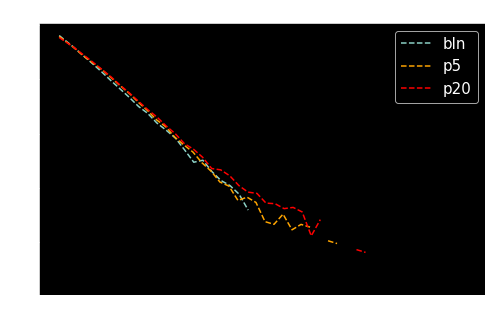

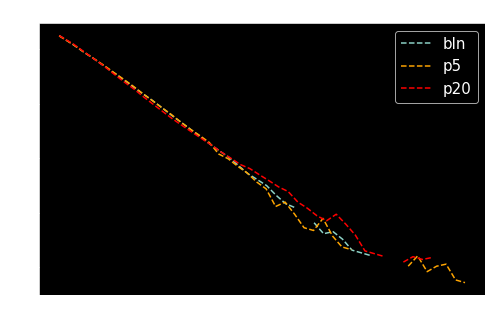

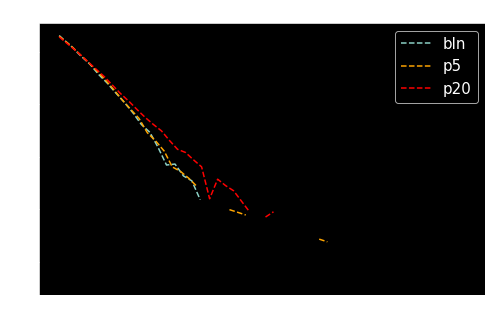

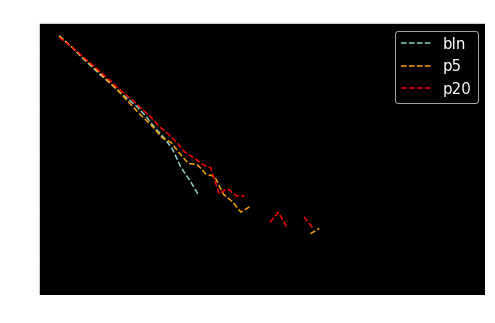

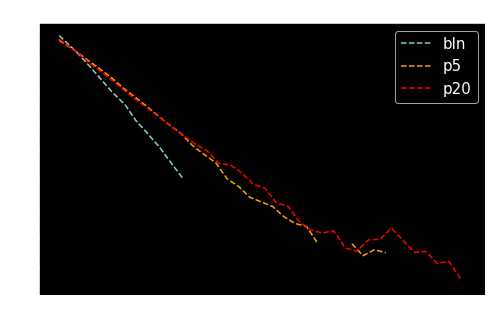

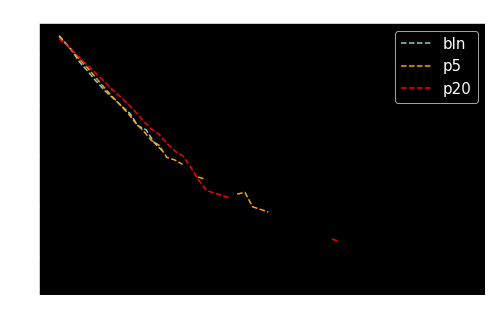

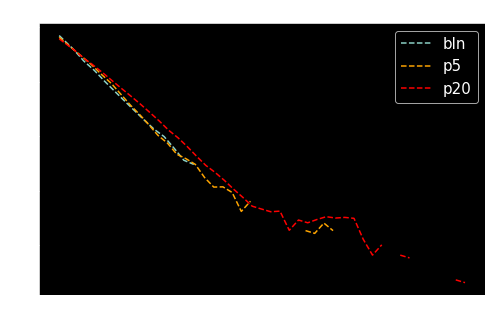

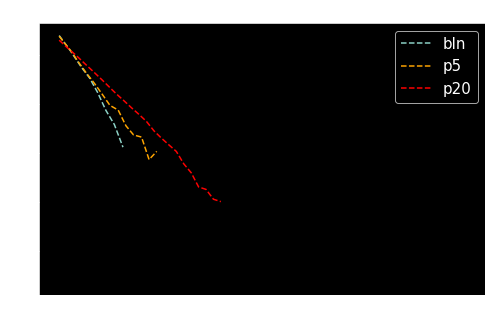

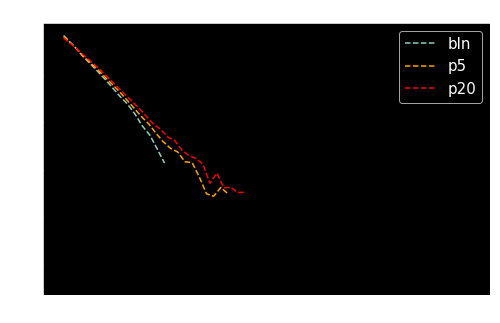

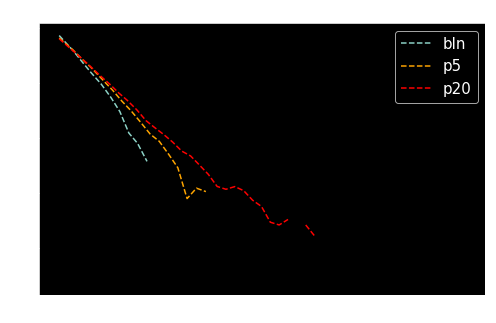

In [21]:
import powerlaw

avlist = (blnli2, p5li2, p20li2)
ok =['bln', 'p5', 'p20']
for e in range(0,10):
    f, axarr = plt.subplots(figsize = (8,5))
    ccdf = powerlaw.plot_pdf(np.load(avlist[0][e])[0], linestyle = '--', label = 'bln')
    ccdf1 = powerlaw.plot_pdf(np.load(avlist[1][e])[0], c = 'orange', linestyle = '--', label = 'p5')
    ccdf2 = powerlaw.plot_pdf(np.load(avlist[2][e])[0], c = 'r', linestyle = '--', label = 'p20')
    axarr.legend(loc = 1, markerscale = 2,prop={'size': 15})
    axarr.set_title(str(e + 2))
plt.show()

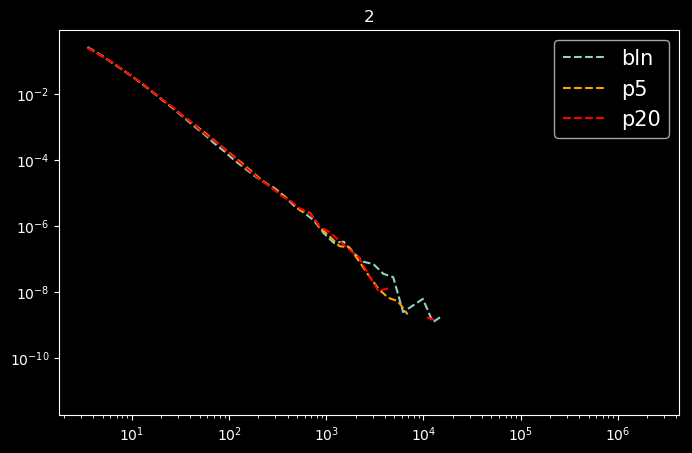

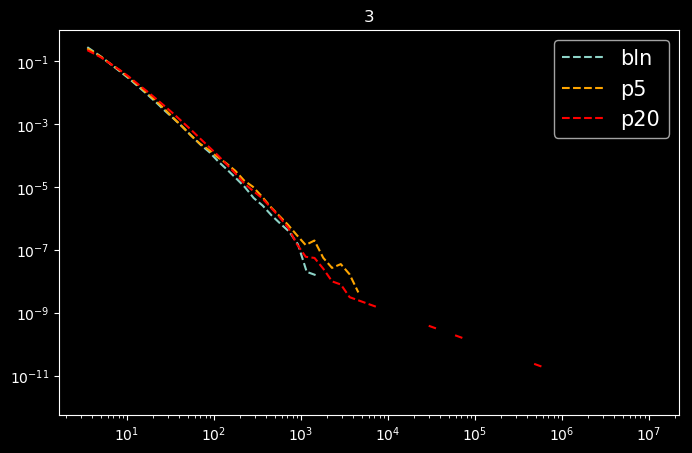

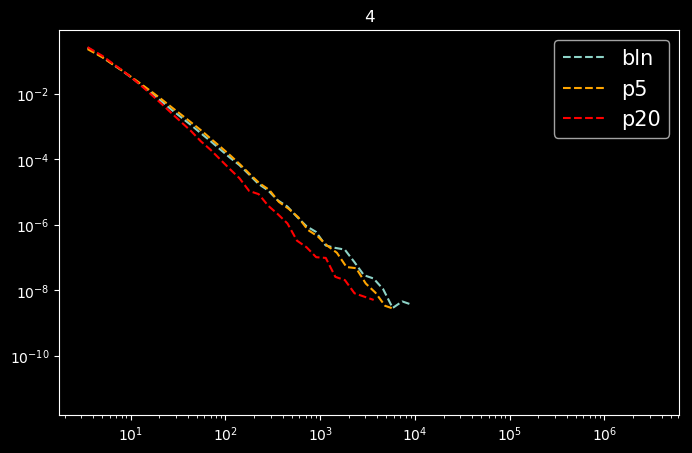

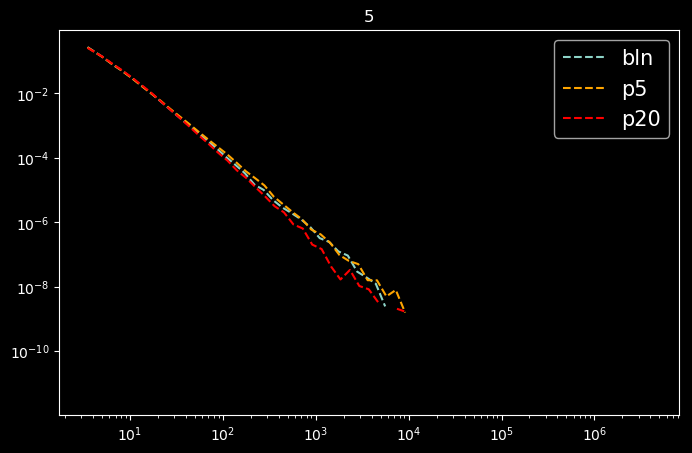

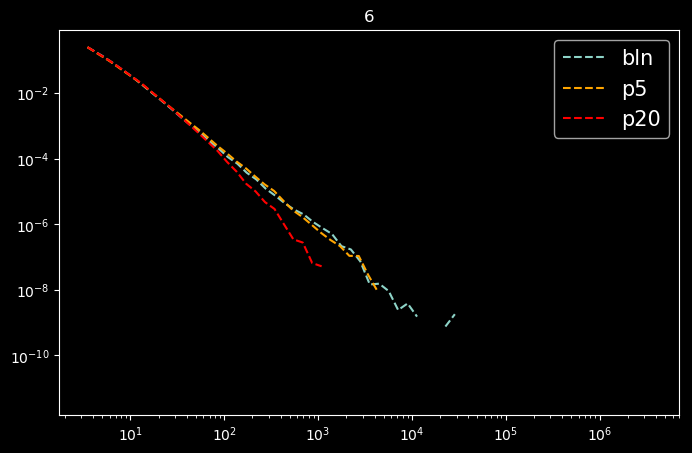

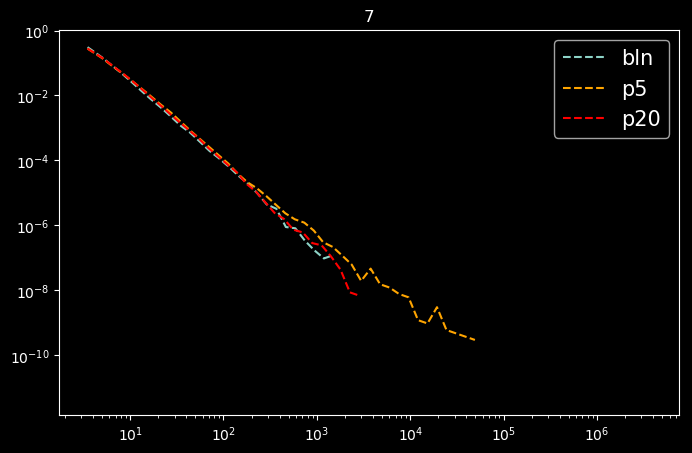

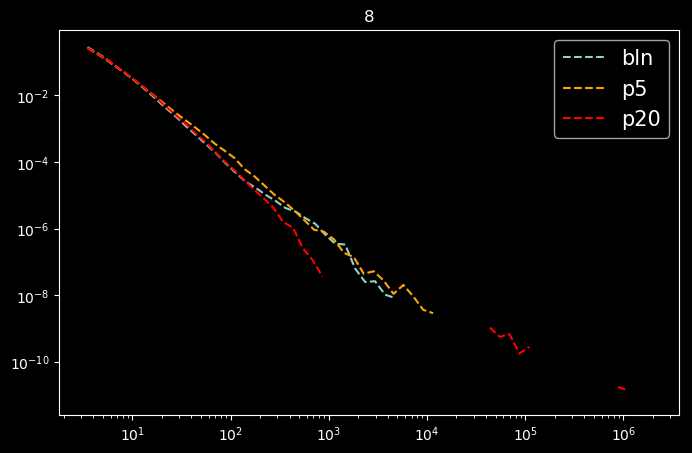

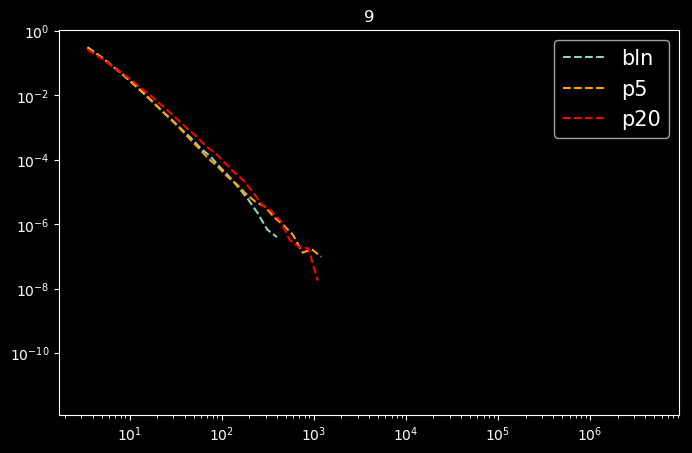

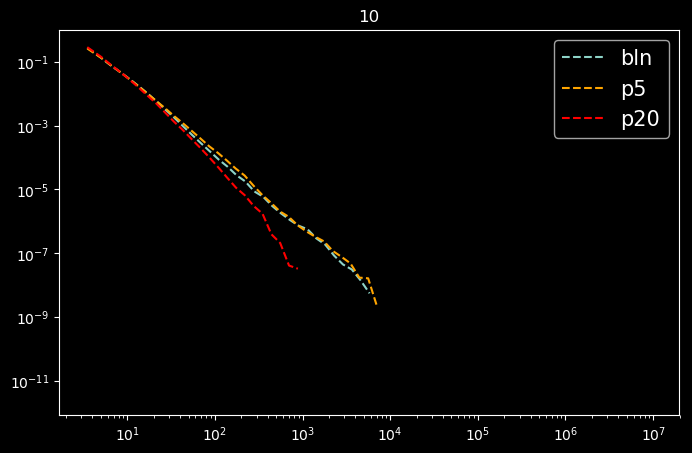

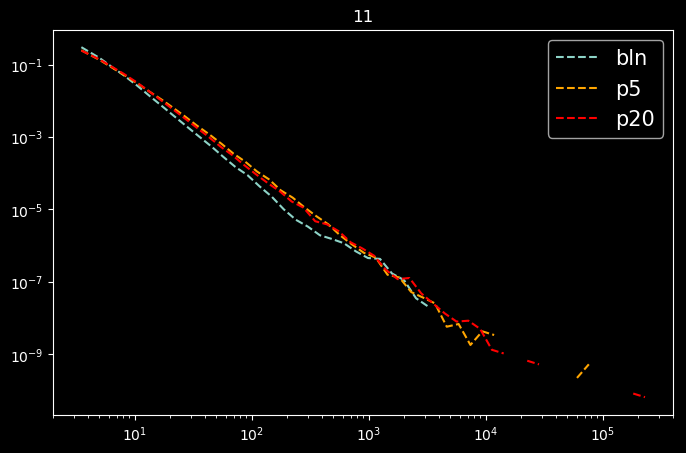

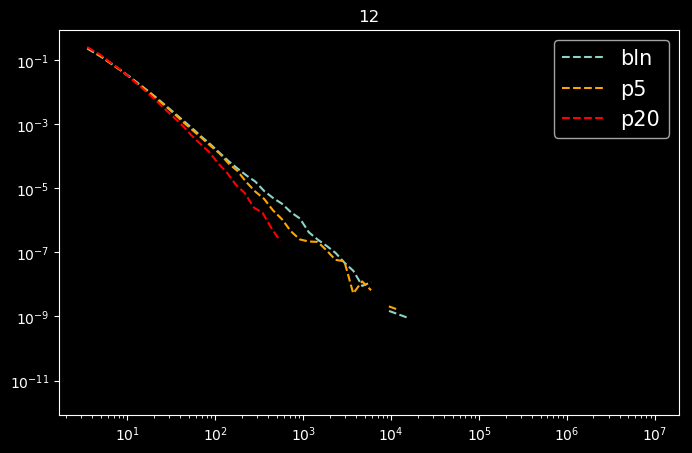

In [181]:
import powerlaw

avlist = (bln_1, p5_1, p20_1)
ok =['bln', 'p5', 'p20']
for e in range(0,11):
    f, axarr = plt.subplots(figsize = (8,5))
    ccdf = powerlaw.plot_pdf(np.load(avlist[0][e])[0], linestyle = '--', label = 'bln')
    ccdf1 = powerlaw.plot_pdf(np.load(avlist[1][e])[0], c = 'orange', linestyle = '--', label = 'p5')
    ccdf2 = powerlaw.plot_pdf(np.load(avlist[2][e])[0], c = 'r', linestyle = '--', label = 'p20')
    axarr.legend(loc = 1, markerscale = 2,prop={'size': 15})
    axarr.set_title(str(e + 2))
plt.show()

In [24]:
import powerlaw
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)

avlist = (blnli2, p5li2, p20li2)
ok =['bln', 'p5', 'p20']
for e in range(10,11):
    f, axarr = plt.subplots(figsize = (8,5))
    ccdf = powerlaw.plot_ccdf(np.load(avlist[0][e])[0], linestyle = '--', label = 'bln')
    ccdf1 = powerlaw.plot_ccdf(np.load(avlist[1][e])[0], c = 'orange', linestyle = '--', label = 'p5')
    ccdf2 = powerlaw.plot_ccdf(np.load(avlist[2][e])[0], c = 'r', linestyle = '--', label = 'p20')
    axarr.legend(loc = 1, markerscale = 2,prop={'size': 15})
    axarr.set_title(str(e + 2))
    os.chdir(Ffig)
    plt.savefig('powerlaw_ptz_10.png', transparent = True)
plt.show()

IndexError: list index out of range

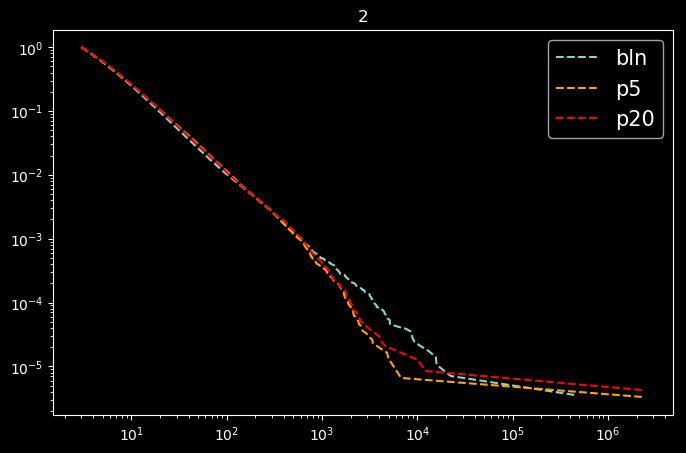

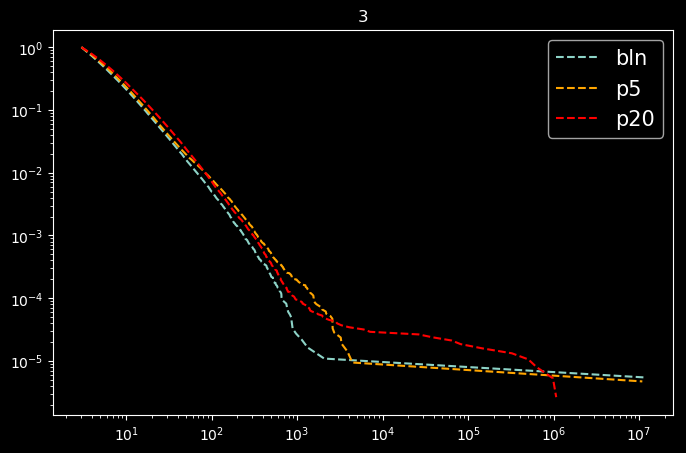

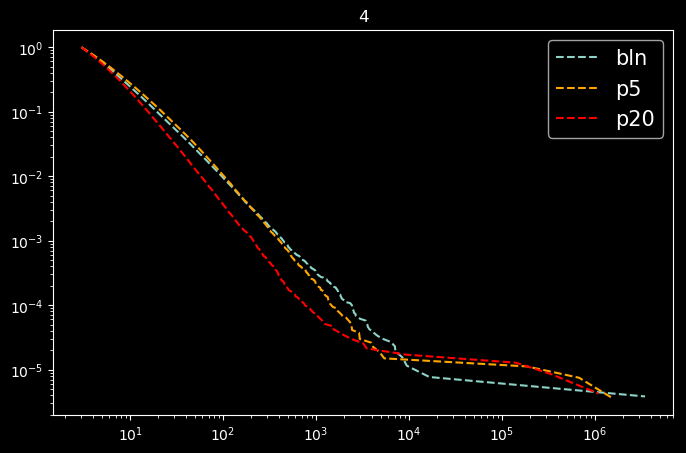

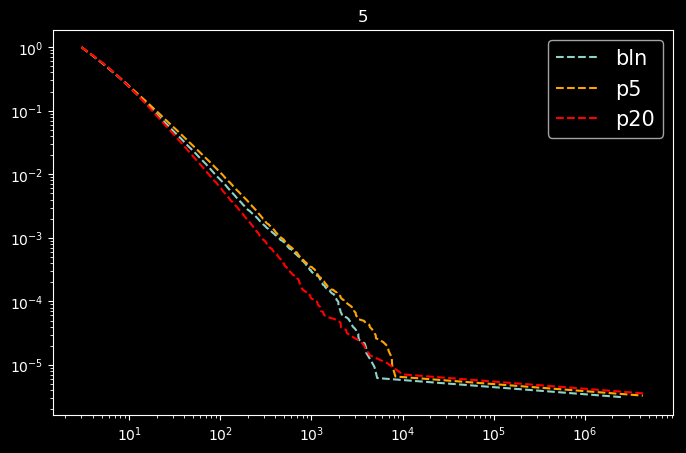

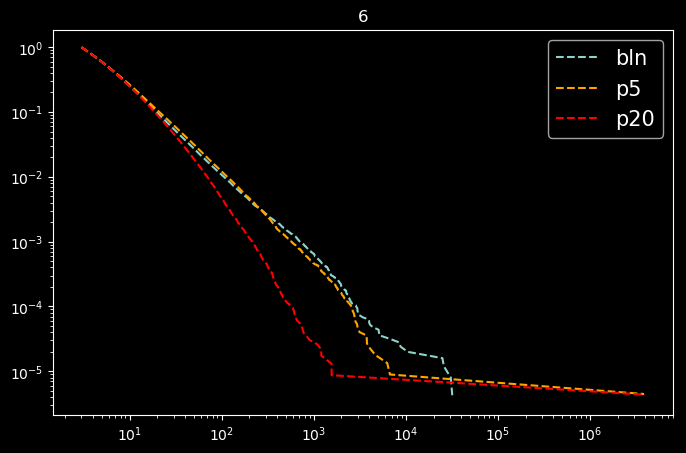

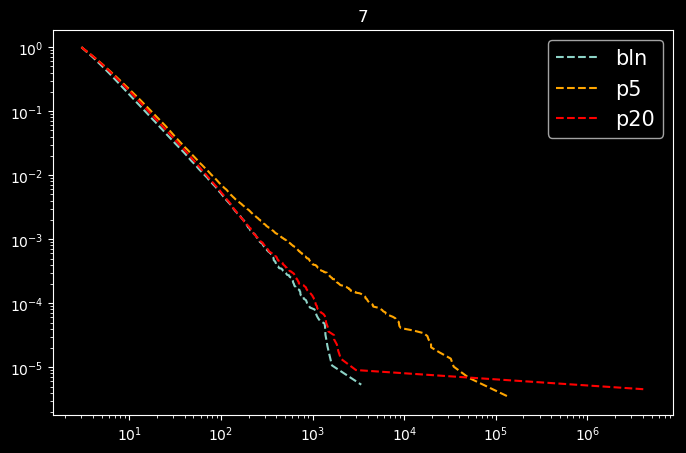

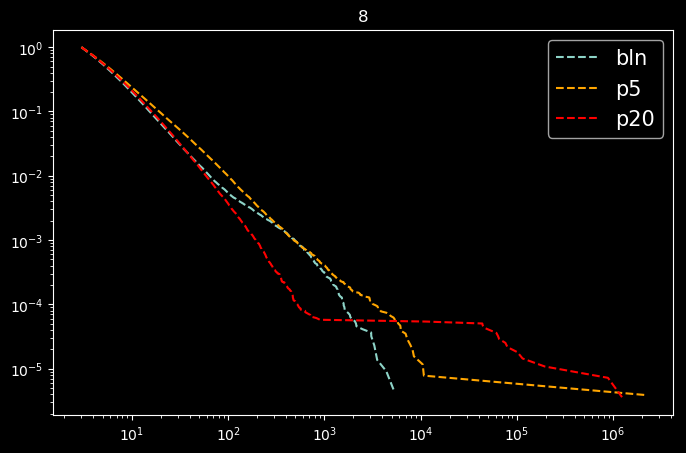

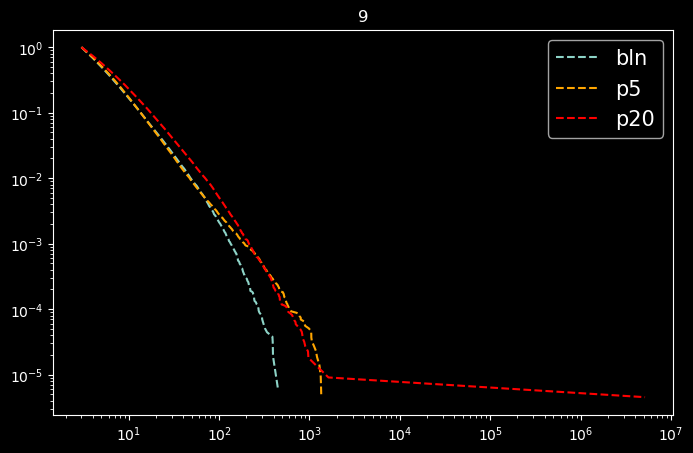

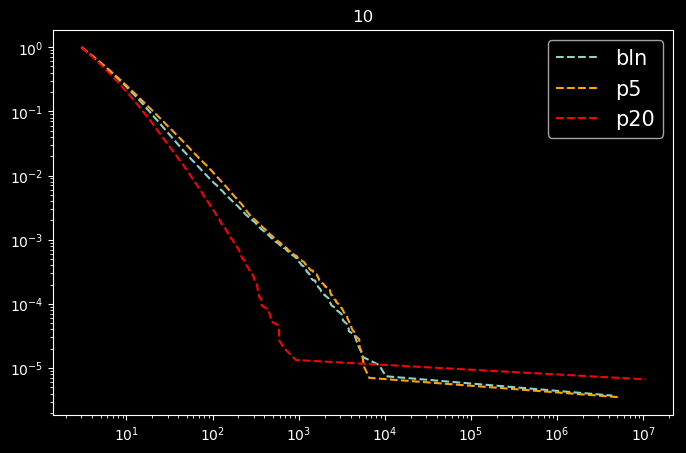

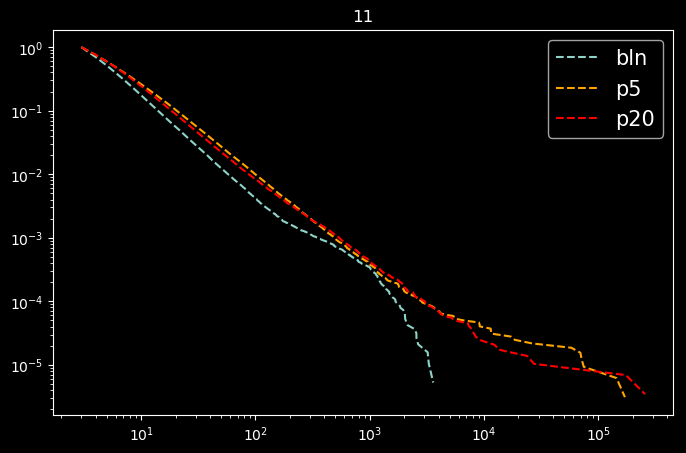

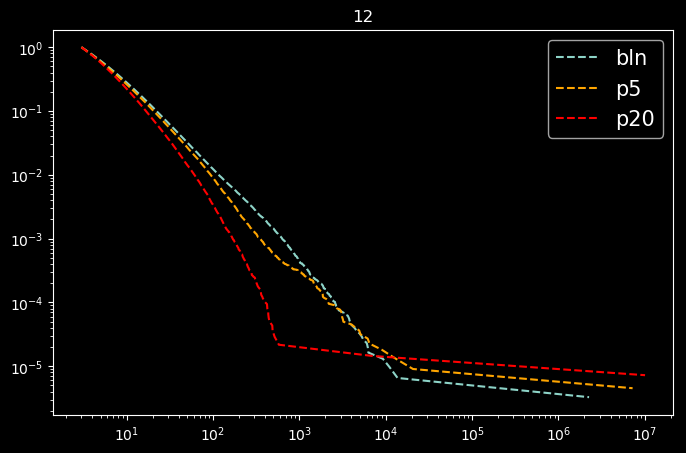

In [184]:
import powerlaw

avlist = (bln_1, p5_1, p20_1)
ok =['bln', 'p5', 'p20']
for e in range(0,11):
    f, axarr = plt.subplots(figsize = (8,5))
    ccdf = powerlaw.plot_ccdf(np.load(avlist[0][e])[0], linestyle = '--', label = 'bln')
    ccdf1 = powerlaw.plot_ccdf(np.load(avlist[1][e])[0], c = 'orange', linestyle = '--', label = 'p5')
    ccdf2 = powerlaw.plot_ccdf(np.load(avlist[2][e])[0], c = 'r', linestyle = '--', label = 'p20')
    axarr.legend(loc = 1, markerscale = 2,prop={'size': 15})
    axarr.set_title(str(e + 2))
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


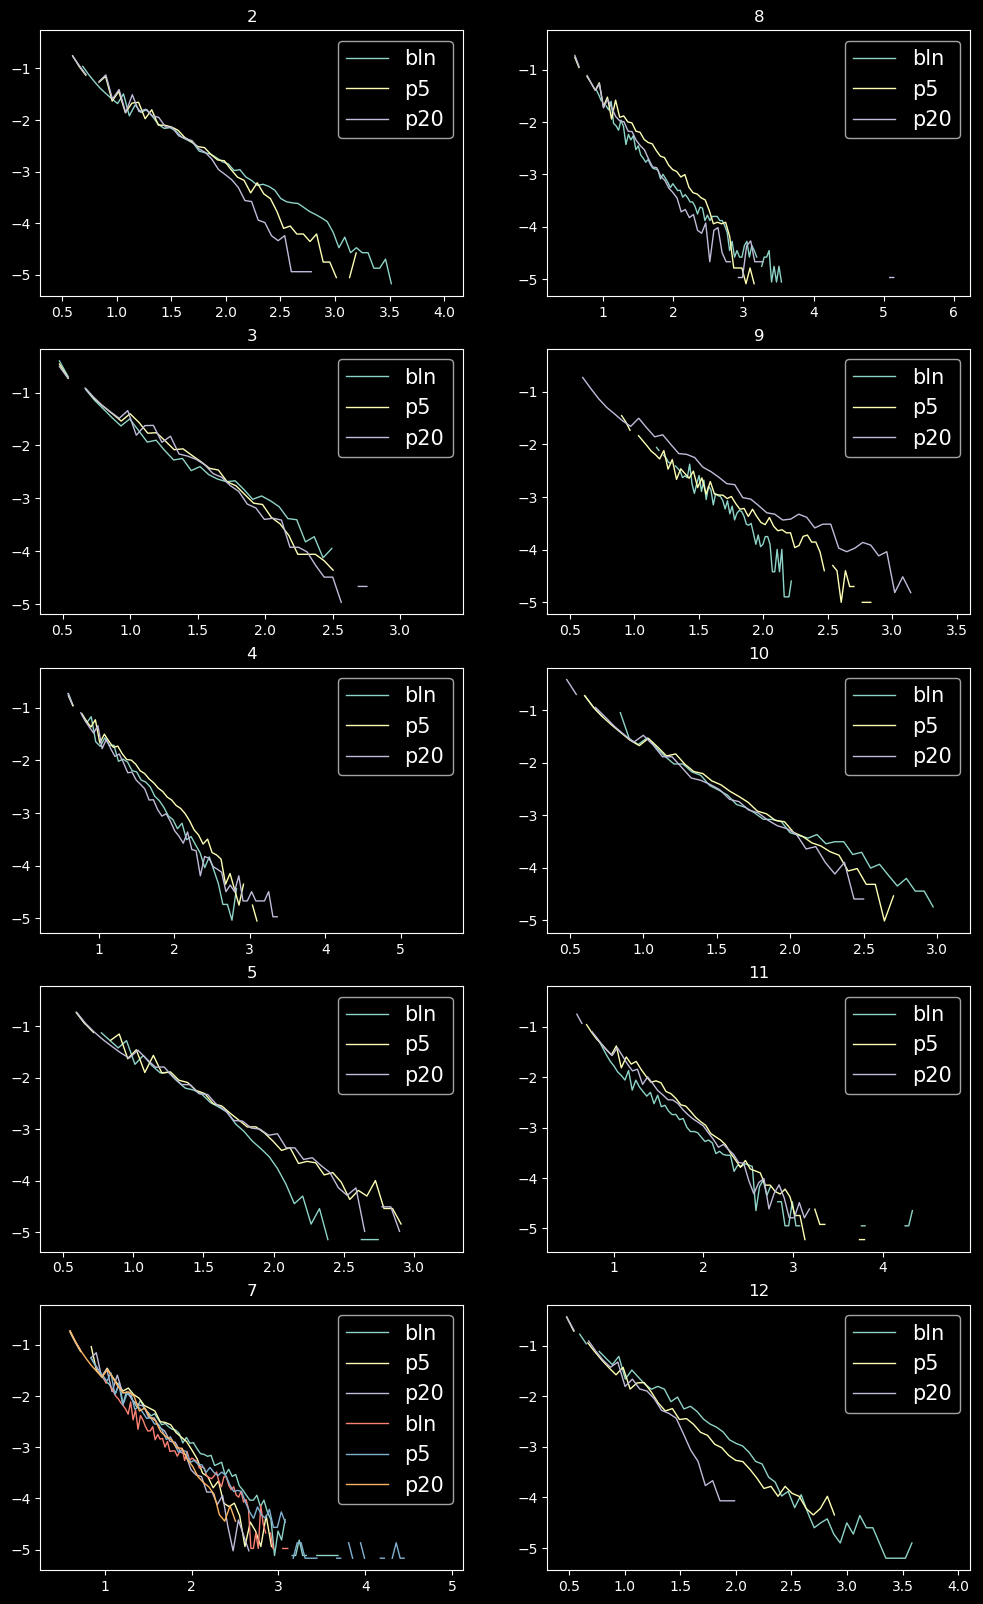

In [185]:
#powerlaw vs lognorm
#-----------------------------------
f, axarr = plt.subplots(5,2, figsize = (12,20))
o,e = 0,0
avlist = (bln_2, p5_2, p20_2)
ok =['bln', 'p5', 'p20']
for f in range(0,11):
    for t in range(0,3):
        avdistcut = np.load(avlist[t][f])[0]
        mini = np.min(avdistcut)
        maxi = np.max(avdistcut)
        binned=np.logspace(np.log10(mini),np.log10(maxi), 100)
        hist = np.histogram(avdistcut, bins = binned)
        xaxis = np.log10(hist[1][:-1])
        yaxis = np.log10(hist[0]/np.sum(hist[0]))
        axarr[o,e].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1, markersize = 1, label = str(ok[t]))  
        axarr[o,e].legend(loc = 1, markerscale = 2,prop={'size': 15})
        axarr[o,e].set_title(str(f + 2))
    if f < 4:o+=1
    if f == 5:
        o = 0
        e = 1
    if f>5:o+=1
    if f == 10:
        break
plt.show()

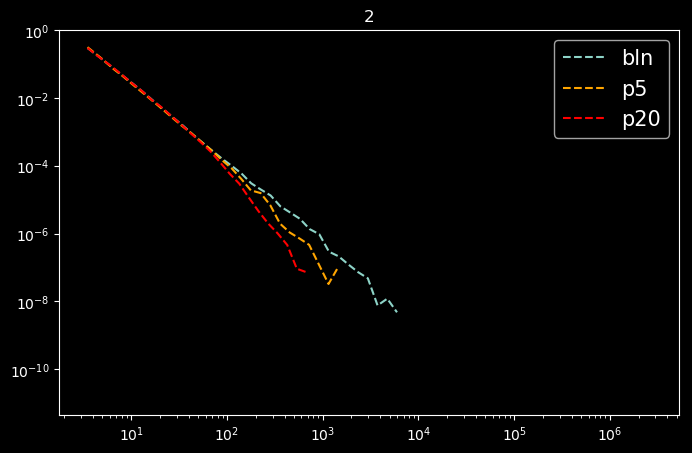

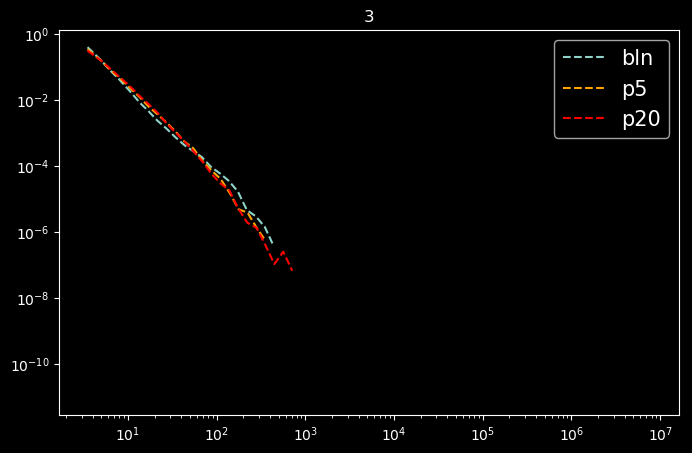

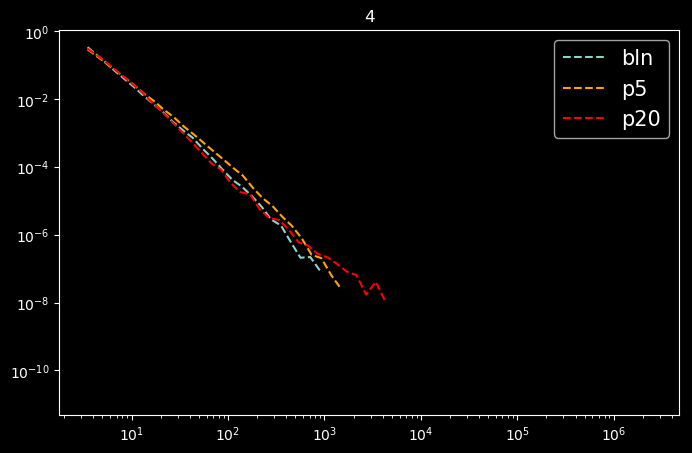

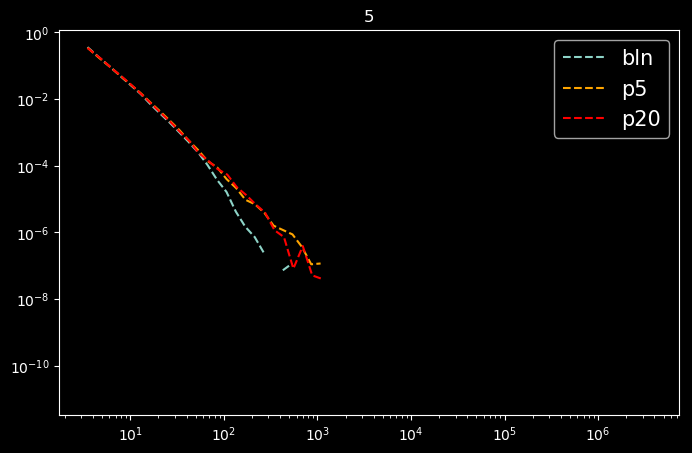

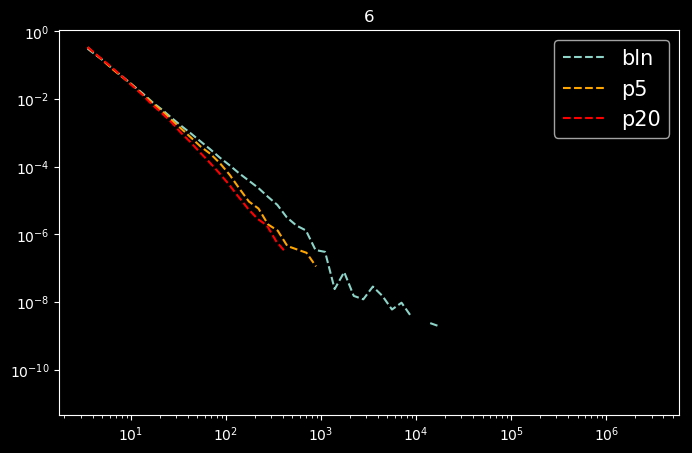

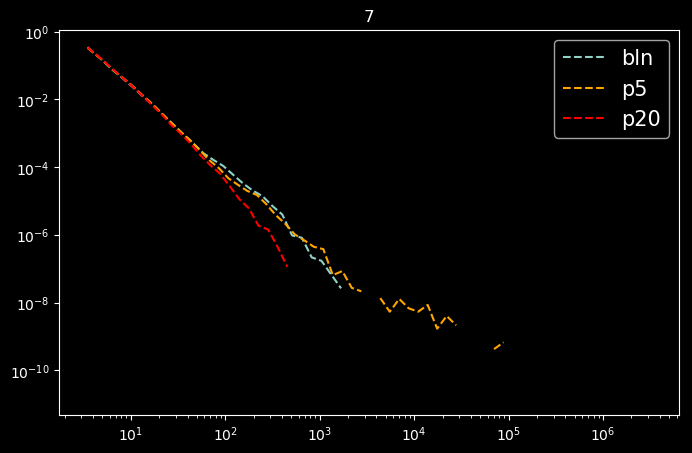

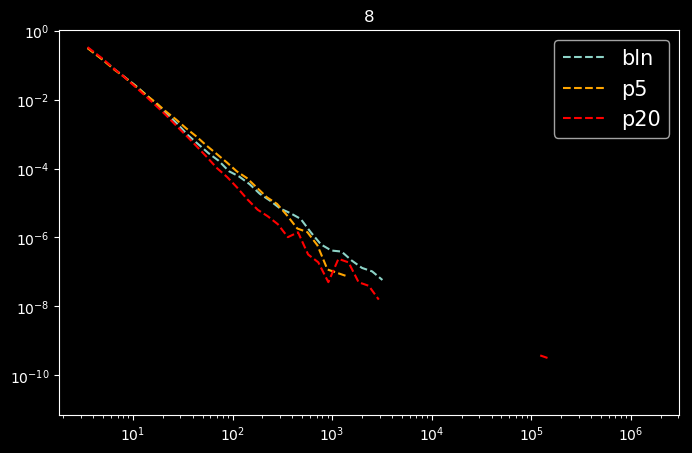

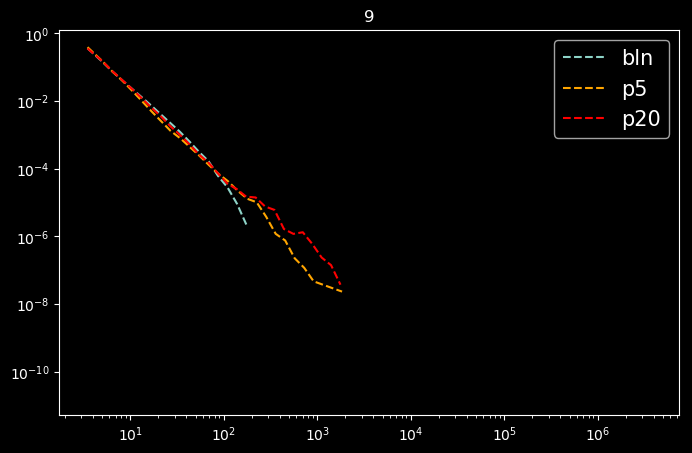

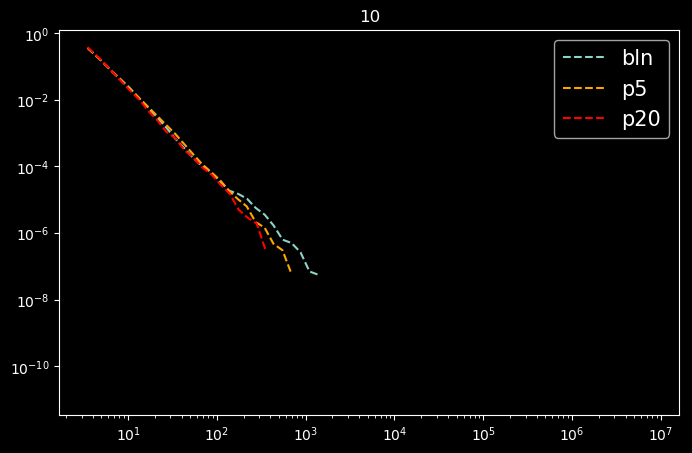

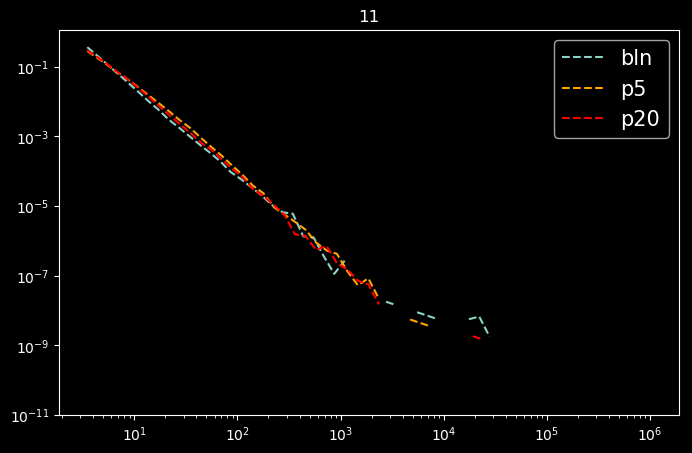

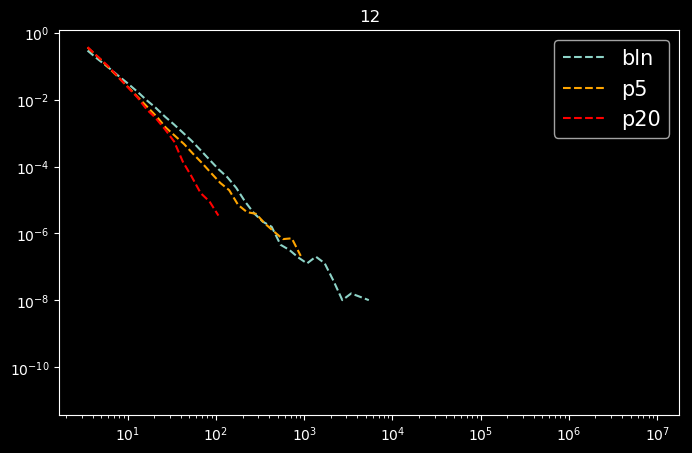

In [186]:
import powerlaw

avlist = (bln_2, p5_2, p20_2)
ok =['bln', 'p5', 'p20']
for e in range(0,11):
    f, axarr = plt.subplots(figsize = (8,5))
    ccdf = powerlaw.plot_pdf(np.load(avlist[0][e])[0], linestyle = '--', label = 'bln')
    ccdf1 = powerlaw.plot_pdf(np.load(avlist[1][e])[0], c = 'orange', linestyle = '--', label = 'p5')
    ccdf2 = powerlaw.plot_pdf(np.load(avlist[2][e])[0], c = 'r', linestyle = '--', label = 'p20')
    axarr.legend(loc = 1, markerscale = 2,prop={'size': 15})
    axarr.set_title(str(e + 2))
plt.show()

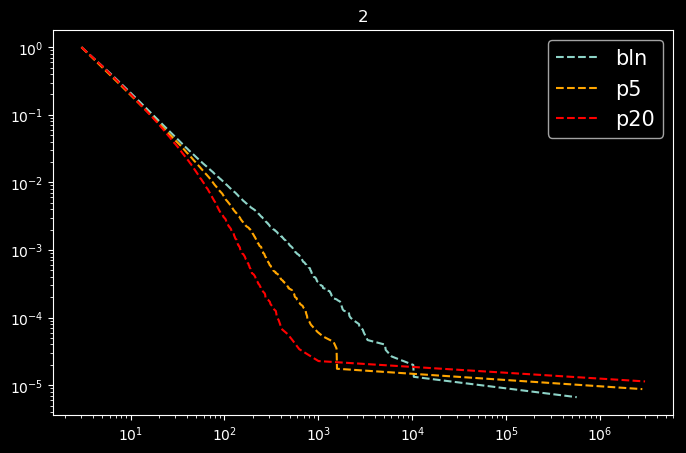

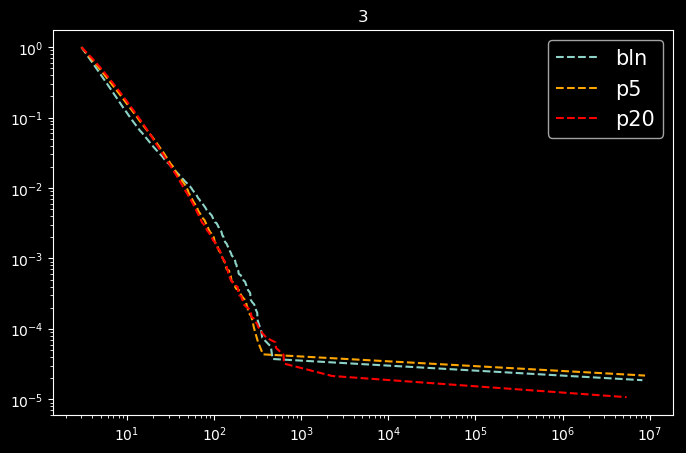

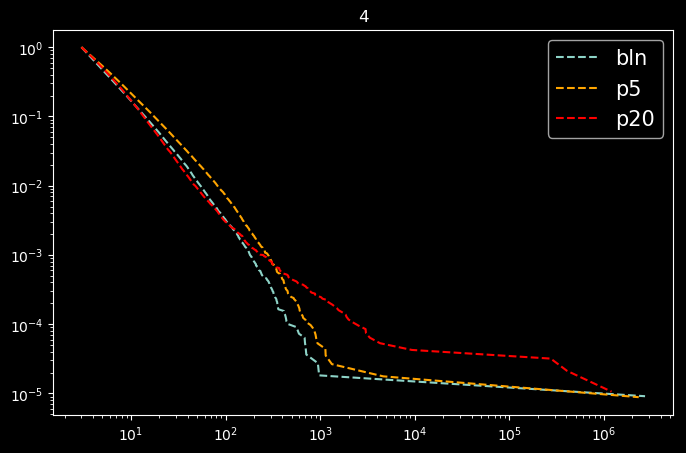

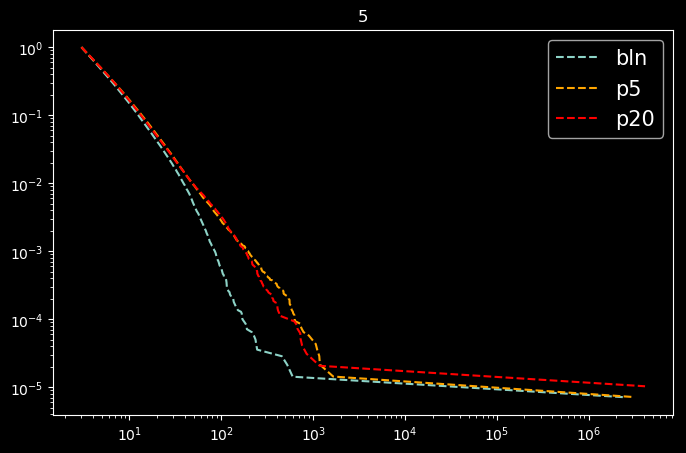

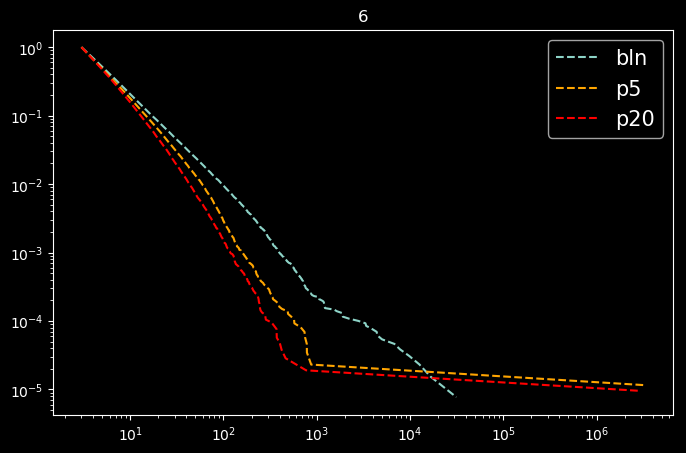

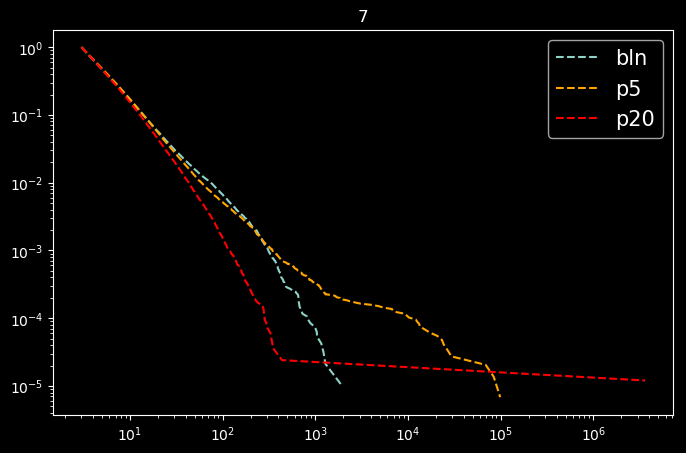

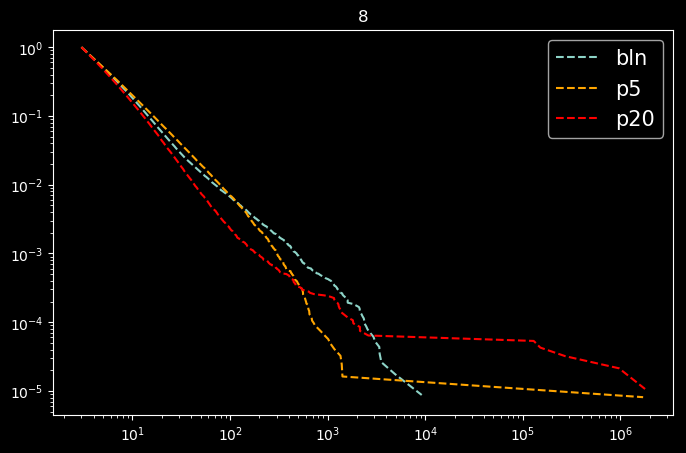

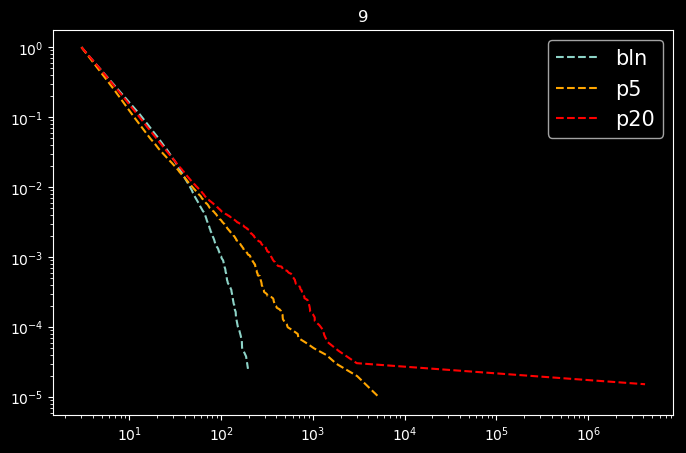

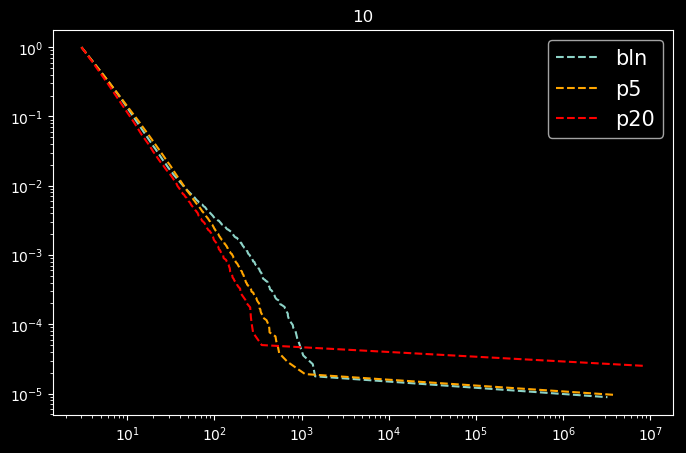

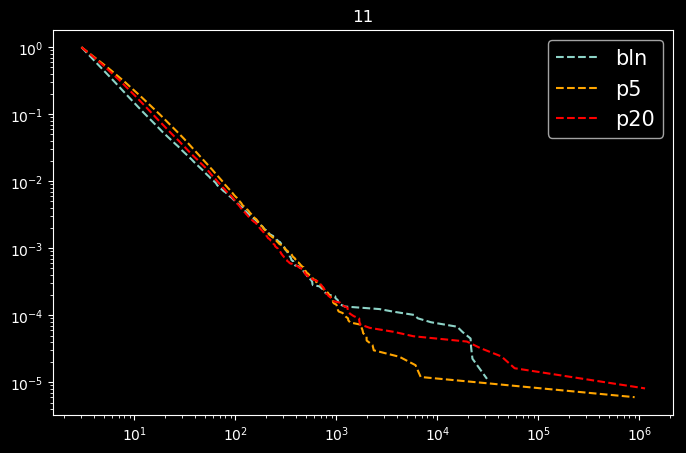

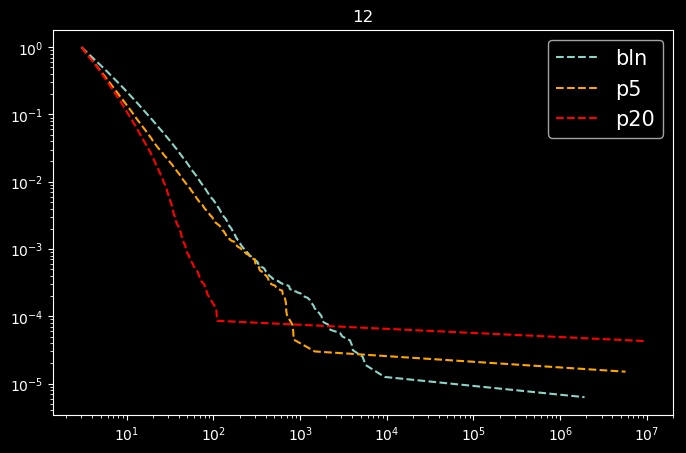

In [187]:
import powerlaw

avlist = (bln_2, p5_2, p20_2)
ok =['bln', 'p5', 'p20']
for e in range(0,11):
    f, axarr = plt.subplots(figsize = (8,5))
    ccdf = powerlaw.plot_ccdf(np.load(avlist[0][e])[0], linestyle = '--', label = 'bln')
    ccdf1 = powerlaw.plot_ccdf(np.load(avlist[1][e])[0], c = 'orange', linestyle = '--', label = 'p5')
    ccdf2 = powerlaw.plot_ccdf(np.load(avlist[2][e])[0], c = 'r', linestyle = '--', label = 'p20')
    axarr.legend(loc = 1, markerscale = 2,prop={'size': 15})
    axarr.set_title(str(e + 2))
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


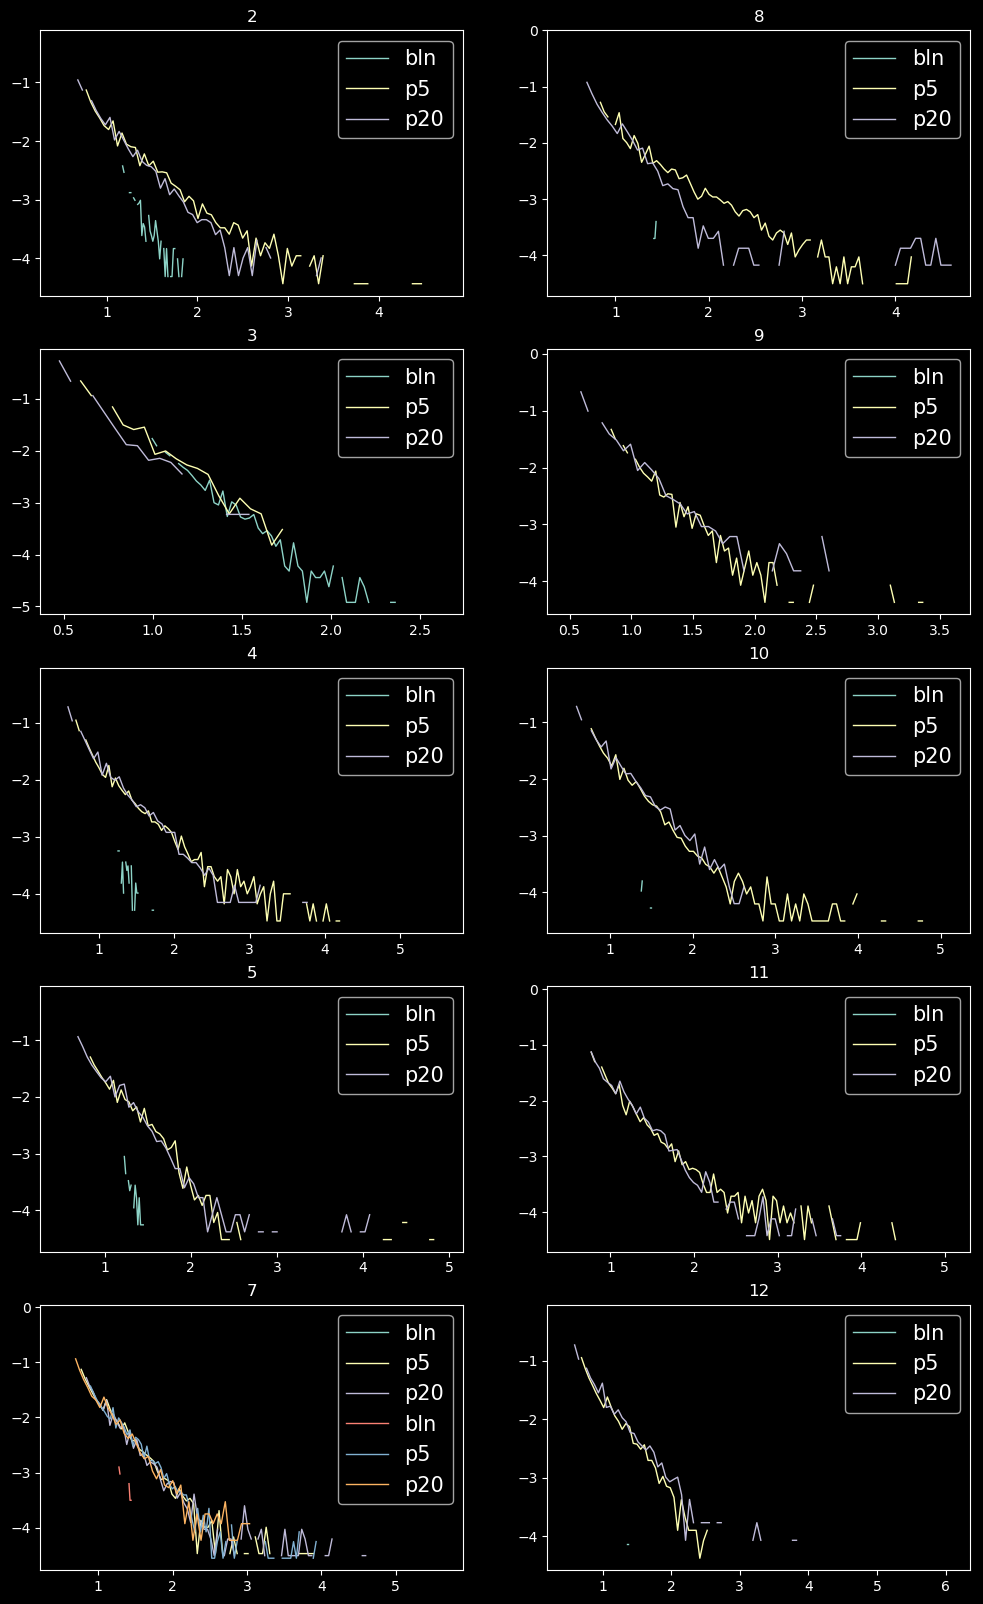

In [529]:
#powerlaw vs lognorm
#-----------------------------------
f, axarr = plt.subplots(5,2, figsize = (12,20))
o,e = 0,0
avlist = (bln_o, p5_o, p20_o)
ok =['bln', 'p5', 'p20']
for f in range(0,11):
    for t in range(0,3):
        avdistcut = np.load(avlist[t][f])[0]
        mini = np.min(avdistcut)
        maxi = np.max(avdistcut)
        binned=np.logspace(np.log10(mini),np.log10(maxi), 100)
        hist = np.histogram(avdistcut, bins = binned)
        xaxis = np.log10(hist[1][:-1])
        yaxis = np.log10(hist[0]/np.sum(hist[0]))
        axarr[o,e].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1, markersize = 1, label = str(ok[t]))  
        axarr[o,e].legend(loc = 1, markerscale = 2,prop={'size': 15})
        axarr[o,e].set_title(str(f + 2))
    if f < 4:o+=1
    if f == 5:
        o = 0
        e=1
    if f>5:o+=1
    if f == 10:
        break
plt.show()



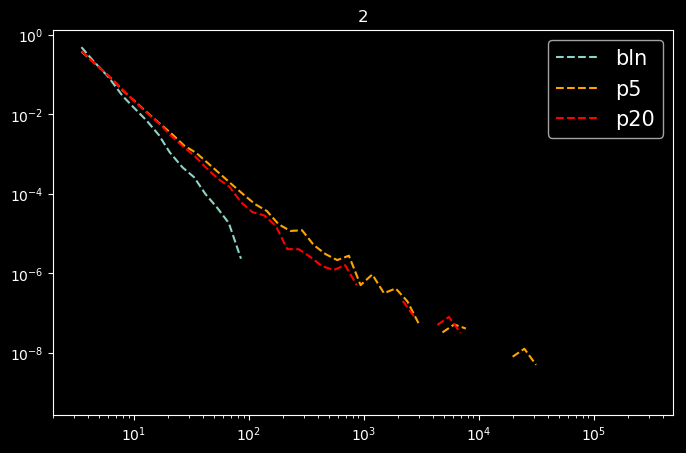

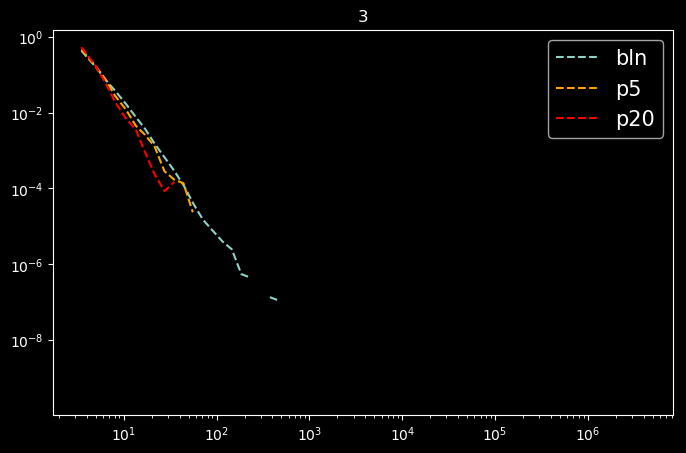

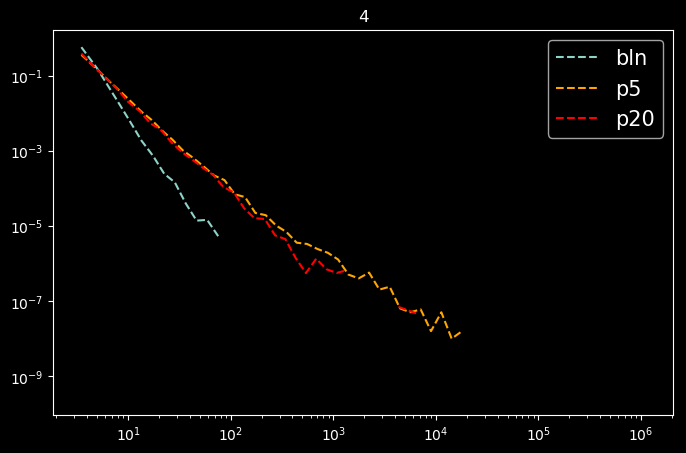

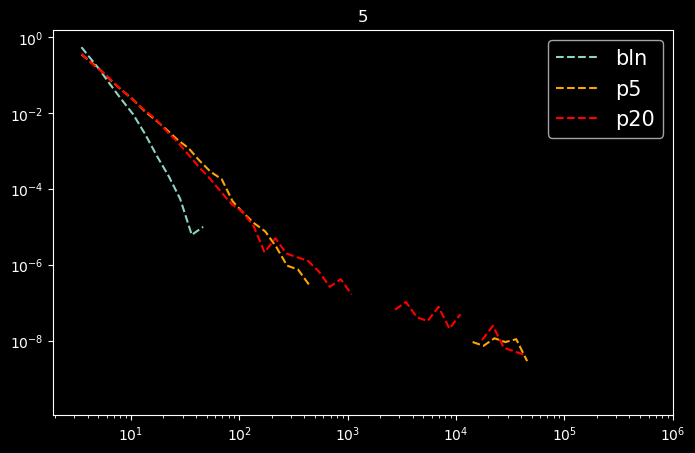

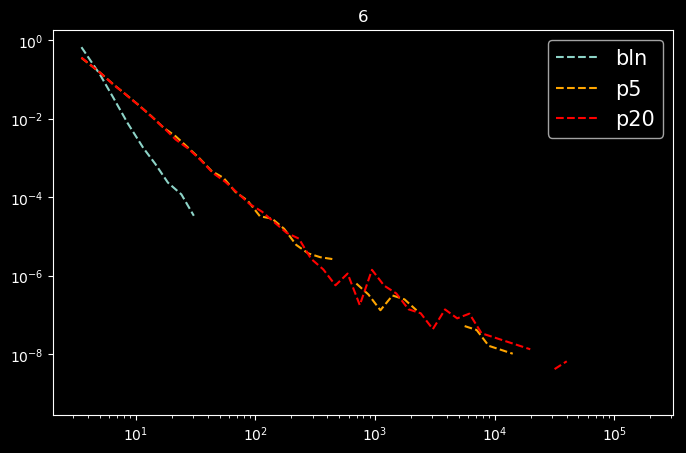

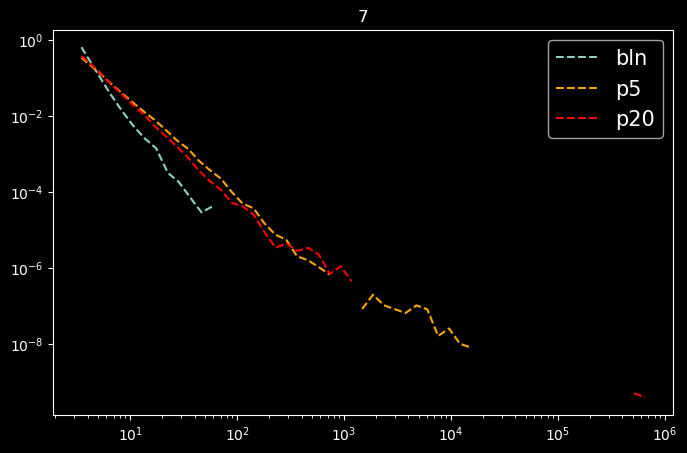

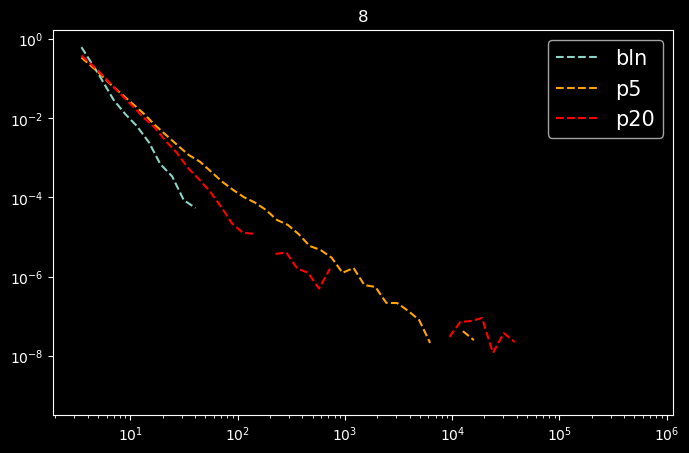

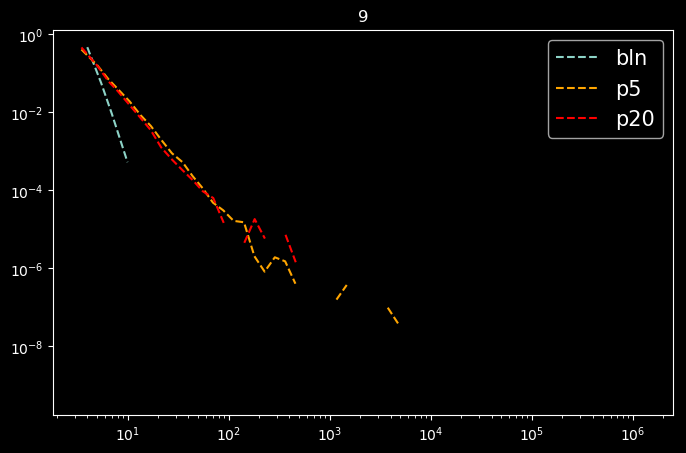

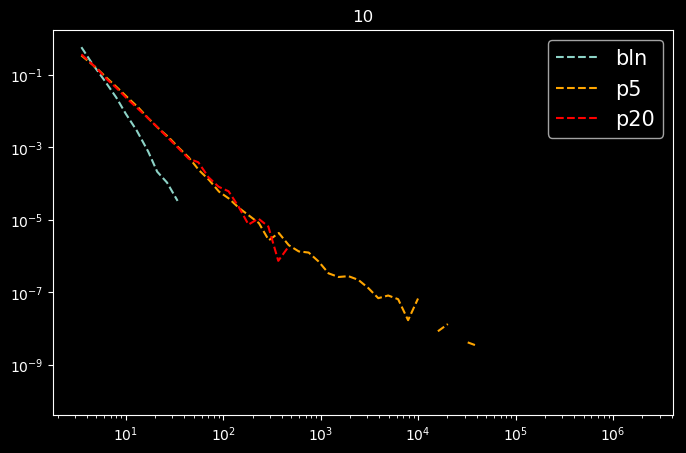

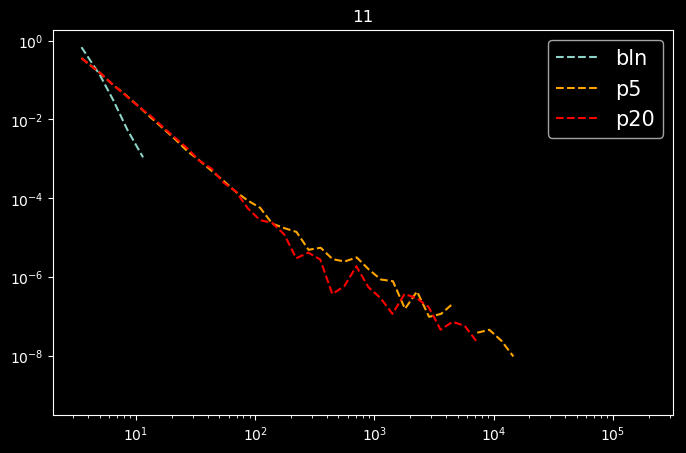

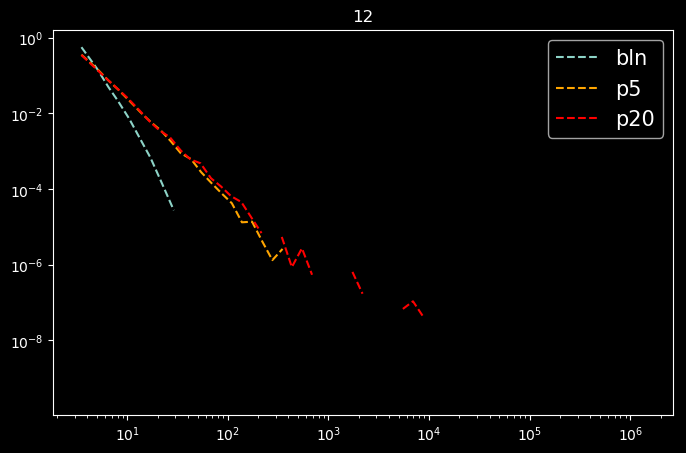

In [530]:
import powerlaw

avlist = (bln_o, p5_o, p20_o)
ok =['bln', 'p5', 'p20']
for e in range(0,11):
    f, axarr = plt.subplots(figsize = (8,5))
    ccdf = powerlaw.plot_pdf(np.load(avlist[0][e])[0], linestyle = '--', label = 'bln')
    ccdf1 = powerlaw.plot_pdf(np.load(avlist[1][e])[0], c = 'orange', linestyle = '--', label = 'p5')
    ccdf2 = powerlaw.plot_pdf(np.load(avlist[2][e])[0], c = 'r', linestyle = '--', label = 'p20')
    axarr.legend(loc = 1, markerscale = 2,prop={'size': 15})
    axarr.set_title(str(e + 2))
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


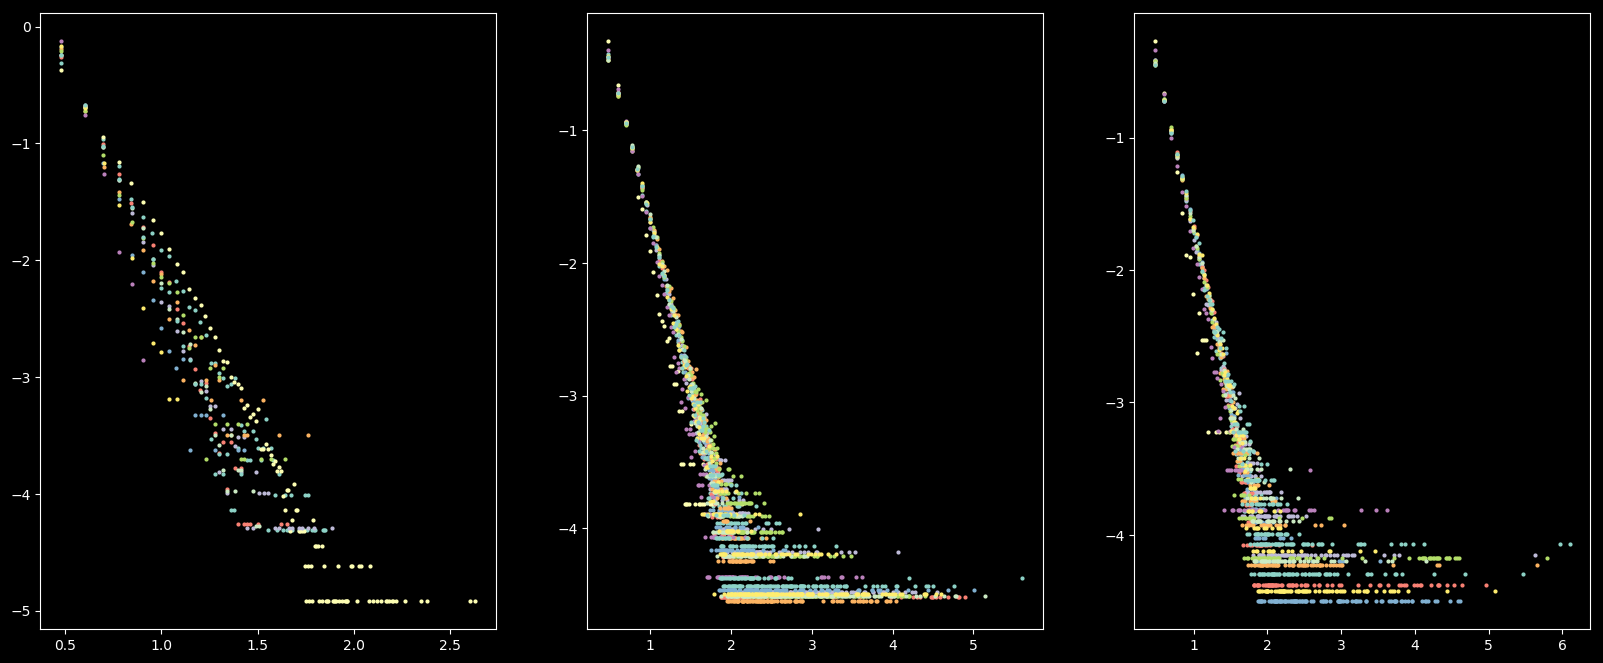

In [532]:
f, axarr = plt.subplots(1,3, figsize = (20,8))
colors = plt.cm.RdYlGn(np.linspace(0,1,5))
for t in range(0,3):
    avlist = (bln_o, p5_o, p20_o)
    for i in range(len(bln_1)):
        avdistcut = np.load(avlist[t][i])[0]
        mini = np.min(avdistcut)
        maxi = np.max(avdistcut)
        binned=np.logspace(np.log10(mini),np.log10(maxi), 1000)
        hist = np.histogram(avdistcut, bins = binned)
        xaxis = np.log10(hist[1][:-1])
        yaxis = np.log10(hist[0]/np.sum(hist[0]))
        axarr[t].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 2)
plt.show()

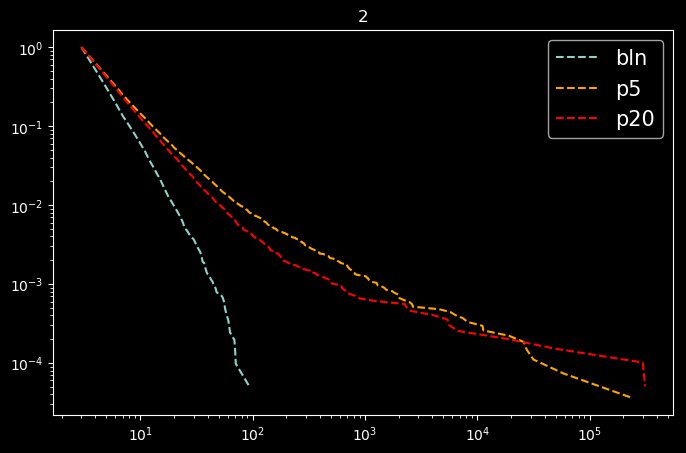

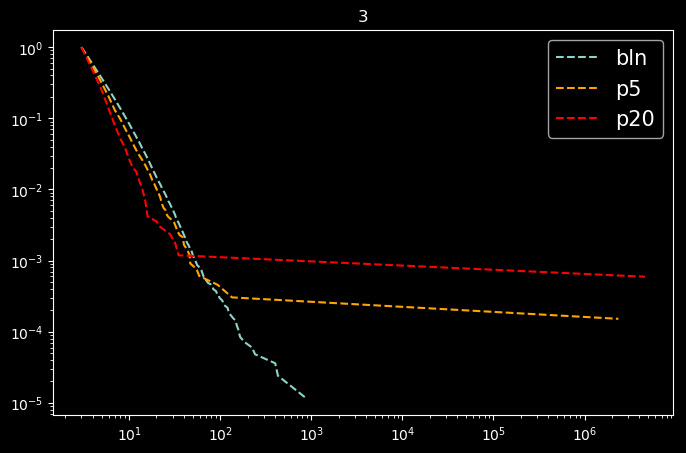

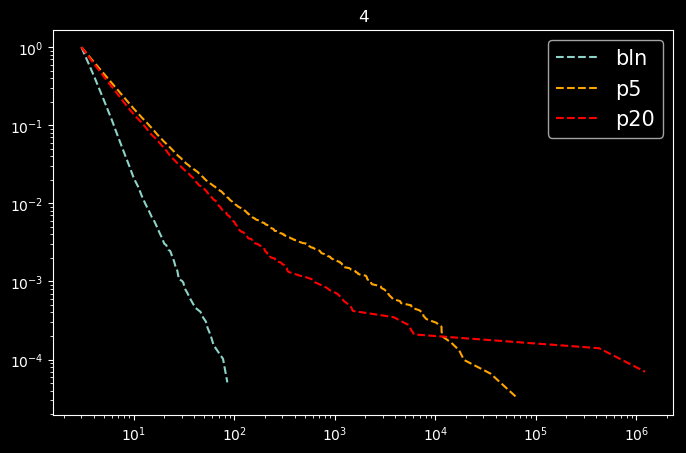

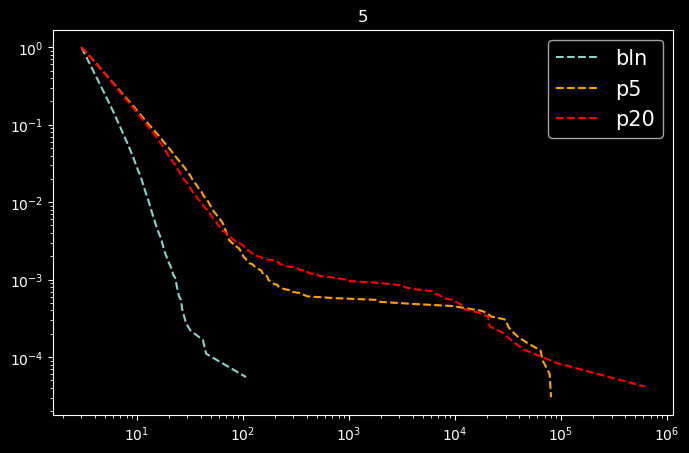

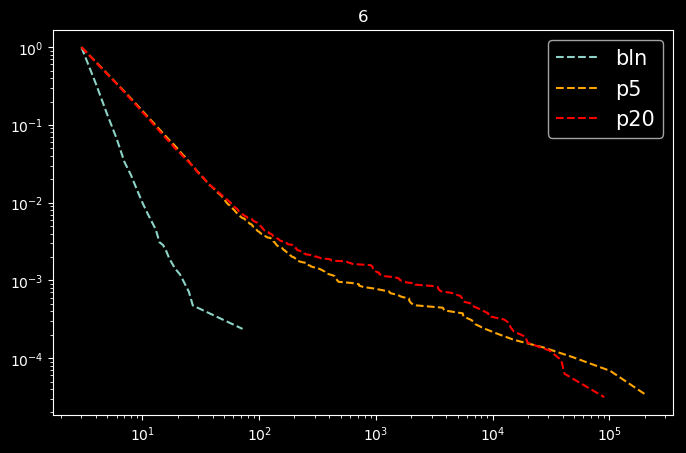

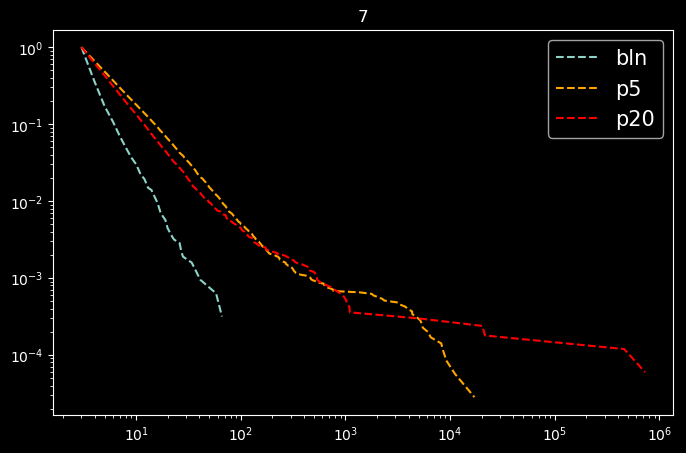

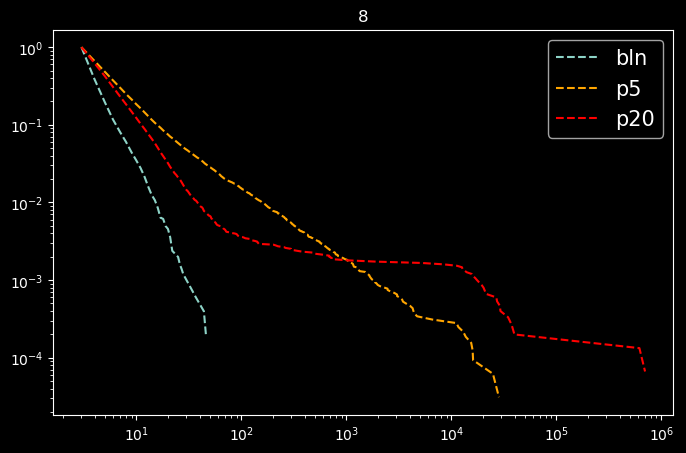

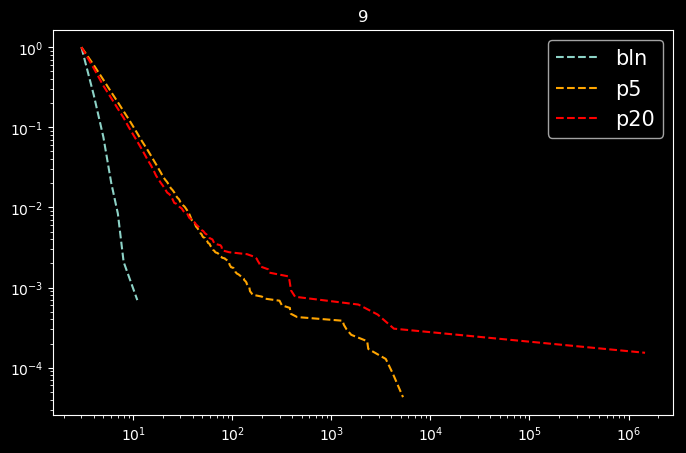

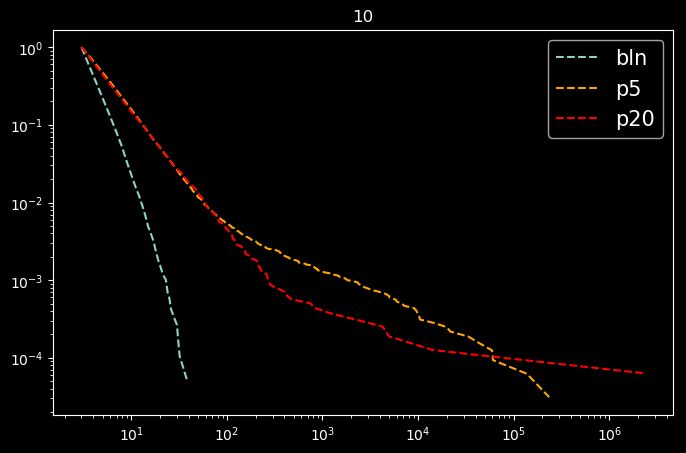

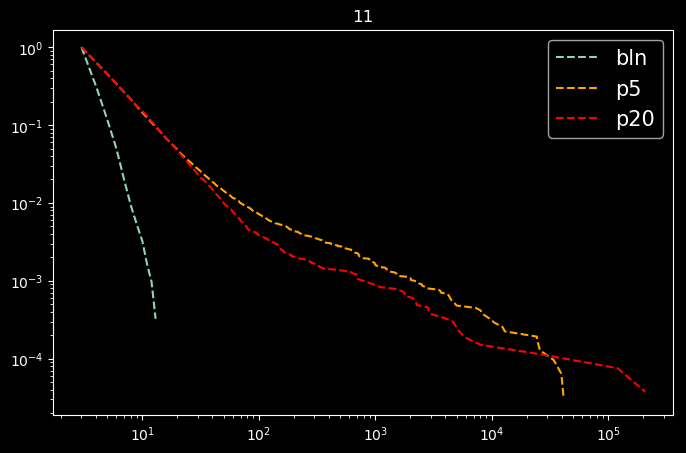

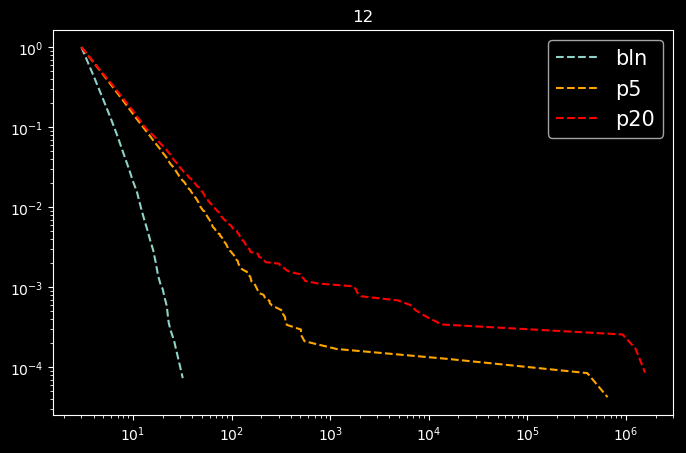

In [531]:
import powerlaw

avlist = (bln_o, p5_o, p20_o)
ok =['bln', 'p5', 'p20']
for e in range(0,11):
    f, axarr = plt.subplots(figsize = (8,5))
    ccdf = powerlaw.plot_ccdf(np.load(avlist[0][e])[0], linestyle = '--', label = 'bln')
    ccdf1 = powerlaw.plot_ccdf(np.load(avlist[1][e])[0], c = 'orange', linestyle = '--', label = 'p5')
    ccdf2 = powerlaw.plot_ccdf(np.load(avlist[2][e])[0], c = 'r', linestyle = '--', label = 'p20')
    axarr.legend(loc = 1, markerscale = 2,prop={'size': 15})
    axarr.set_title(str(e + 2))
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


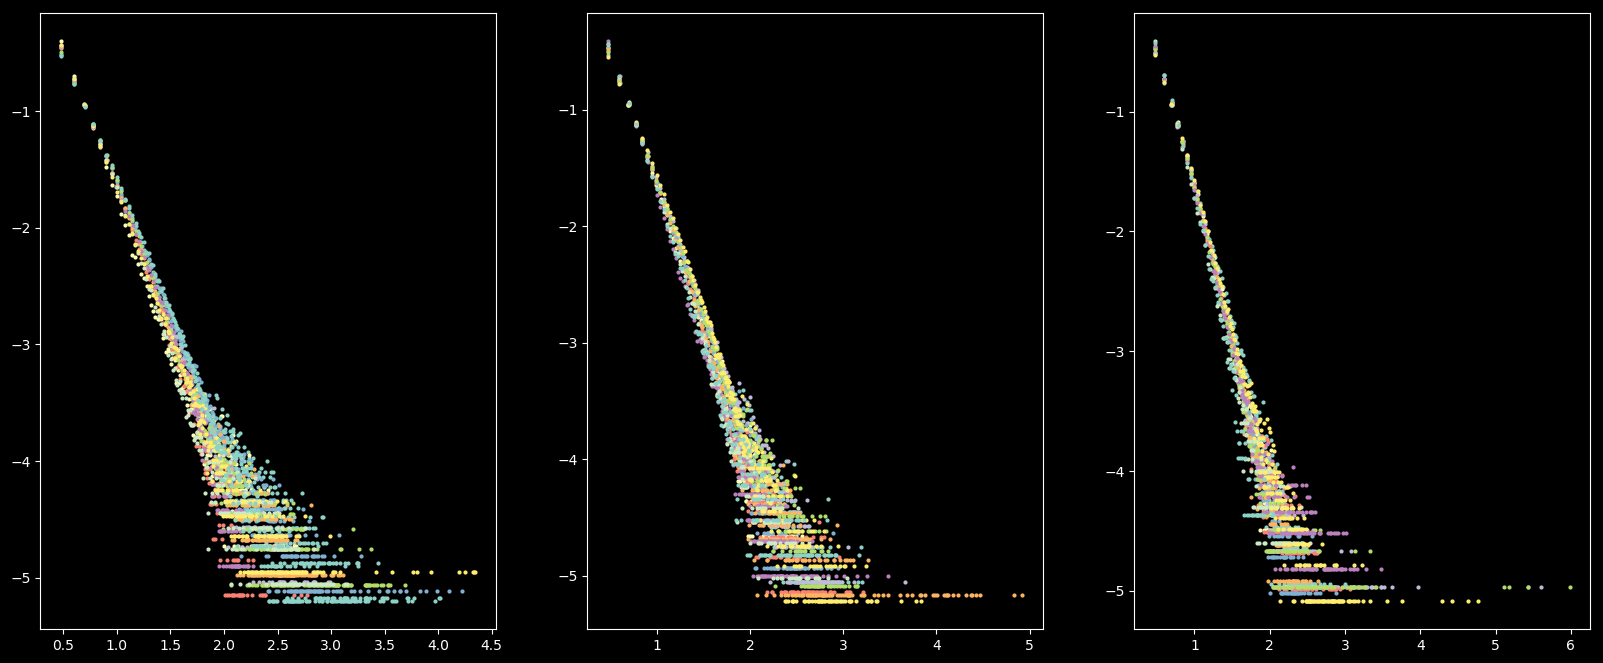

In [103]:
f, axarr = plt.subplots(1,3, figsize = (20,8))
colors = plt.cm.RdYlGn(np.linspace(0,1,5))
for t in range(0,3):
    avlist = (bln_2, p5_2, p20_2)
    for i in range(len(bln_1)):
        avdistcut = np.load(avlist[t][i])[0]
        mini = np.min(avdistcut)
        maxi = np.max(avdistcut)
        binned=np.logspace(np.log10(mini),np.log10(maxi), 1000)
        hist = np.histogram(avdistcut, bins = binned)
        xaxis = np.log10(hist[1][:-1])
        yaxis = np.log10(hist[0]/np.sum(hist[0]))
        axarr[t].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o', linewidth = 1, markersize = 2)
plt.show()

In [3]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
itbinlist = sorted(glob.glob('*.*binarised*')) #iterated list - binarised trace
binlist = sorted(glob.glob('*_PTZ*cutbinarised.npy')) #list - binarised trace
cutbinlist = sorted(glob.glob('*cutbinarised.npy')) #list - 30 minute binarised trace
nnblist = sorted(glob.glob('*_PTZ*_nnb.npy')) #list - nearest neighbour matrix
itnnblist = sorted(glob.glob('*itnnb*')) #iterated list - nearest neighbour matrix
itpkglist = sorted(glob.glob('*03*nnbpkg*')) #list - peak group duration
itavlist = sorted(glob.glob('*-02*nnbav*')) #list - avalanche size and duration array
BLNavlist = sorted(glob.glob('*_BLN*_av*')) #list - avalanche size and duration array
P20avlist = sorted(glob.glob('*_PTZ20*_av*')) #list - avalanche size and duration array
P5avlist = sorted(glob.glob('*_PTZ05*_av*')) 

In [ ]:
[1000.0, 210.0, 150.0, 990.0, 4, 5, 6, 7, 8, 9, 10]

In [20]:
import powerlaw
#-----------
for i in range(len(avlist)):
    data = np.load(avlist[i])[0]
    maxi = 100
    fit = powerlaw.Fit(data, discrete = True, xmax = maxi)
    alpha = fit.power_law.alpha
    sigma = fit.power_law.sigma
    R, p = fit.distribution_compare('truncated_power_law', 'lognormal', normalized_ratio=True)
    
    print(avlist[i][avlist[i].find('run')-4:avlist[i].find('run')-1] + ' likelihood = ' + str(R) + ' ' + 'p-value = ' + str(p) + ' alpha = ' + str(alpha) + 'sigma = ' + str(sigma))  

Calculating best minimal value for power law fit


BLN likelihood = 3.0752162107081555 p-value = 0.0021035000444684653 alpha = 2.4834152830161447sigma = 0.010505099544679446


Calculating best minimal value for power law fit


BLN likelihood = 2.137027501250386 p-value = 0.03259575486488704 alpha = 3.1417965623598327sigma = 0.04779652941763361


Calculating best minimal value for power law fit


BLN likelihood = 4.8400270121945805 p-value = 1.29821481724713e-06 alpha = 2.2894328841255867sigma = 0.009063896672013549


Calculating best minimal value for power law fit


BLN likelihood = -1.4110504270081268 p-value = 0.15822974560064307 alpha = 2.5279697332981748sigma = 0.011533243106415984


Calculating best minimal value for power law fit


BLN likelihood = -0.03828339294592357 p-value = 0.9694617315889814 alpha = 3.086231944266105sigma = 0.03202017813933144


Calculating best minimal value for power law fit


BLN likelihood = 0.04402737616899234 p-value = 0.9648825819932885 alpha = 2.851003036589736sigma = 0.013520699618998858


Calculating best minimal value for power law fit


BLN likelihood = 3.461575644213678 p-value = 0.0005370231801142983 alpha = 2.7164233805099878sigma = 0.02017228700826534


Calculating best minimal value for power law fit


BLN likelihood = 1.7210784375574193 p-value = 0.08523659145592452 alpha = 3.760606390232657sigma = 0.05572719835437289


Calculating best minimal value for power law fit


BLN likelihood = 6.362950824475382 p-value = 1.979140705638975e-10 alpha = 2.4247098511131826sigma = 0.009977899258110904


Calculating best minimal value for power law fit


BLN likelihood = 3.3052062234077506 p-value = 0.0009490654051080312 alpha = 2.995625338191892sigma = 0.028453821204419204


Calculating best minimal value for power law fit


BLN likelihood = 3.2135206804052414 p-value = 0.0013111835532567215 alpha = 2.340502555821857sigma = 0.006346183079125972


In [13]:
import powerlaw
#-----------
for i in range(len(avlist)):
    data = np.load(avlist[i])[0]
    maxi = 1000
    fit = powerlaw.Fit(data, discrete = True, xmax = maxi)
    R, p = fit.distribution_compare('truncated_power_law', 'lognormal', normalized_ratio=True)
    
    print(avlist[i][avlist[i].find('run')-4:avlist[i].find('run')-1] + ' likelihood = ' + str(R) + ' ' + 'p-value = ' + str(p))  

Calculating best minimal value for power law fit


BLN likelihood = 2.303726763800088 p-value = 0.021237986475063517


Calculating best minimal value for power law fit


BLN likelihood = 0.04582289120339003 p-value = 0.963451413430263


Calculating best minimal value for power law fit


BLN likelihood = -4.7373692029686945 p-value = 2.165105067581625e-06


Calculating best minimal value for power law fit
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/powerlaw.py:1560: RuntimeWarning: divide by zero encountered in true_divide
  return likelihoods/norm
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/powerlaw.py:1798: RuntimeWarning: invalid value encountered in subtract
  ( (loglikelihoods1-loglikelihoods2) - mean_diff)**2
Calculating best minimal value for power law fit


BLN likelihood = nan p-value = nan
BLN likelihood = nan p-value = nan


Calculating best minimal value for power law fit


BLN likelihood = -0.5398885088314773 p-value = 0.5892739230696391


Calculating best minimal value for power law fit


BLN likelihood = 1.362703222241699 p-value = 0.17297606191324333


Calculating best minimal value for power law fit


BLN likelihood = -1.9864358982949526 p-value = 0.04698494390033107


Calculating best minimal value for power law fit


BLN likelihood = 0.030863807175805422 p-value = 0.9753781538530536


Calculating best minimal value for power law fit


BLN likelihood = -0.3975935955245036 p-value = 0.6909297821978195


Calculating best minimal value for power law fit


BLN likelihood = -1.8548796834566135 p-value = 0.06361340980658683


In [12]:
import powerlaw
#-----------
for i in range(len(avlist)):
    data = np.load(avlist[i])[0]
    maxi = 1000
    fit = powerlaw.Fit(data, discrete = True, xmax = maxi)
    R, p = fit.distribution_compare('truncated_power_law', 'exponential', normalized_ratio=True)
    
    print(avlist[i][avlist[i].find('run')-4:avlist[i].find('run')-1] + ' likelihood = ' + str(R) + ' ' + 'p-value = ' + str(p))  

Calculating best minimal value for power law fit


BLN likelihood = 21.949825741913013 p-value = 8.693402772924258e-107


Calculating best minimal value for power law fit


BLN likelihood = 4.418918073062824 p-value = 9.91962389579086e-06


Calculating best minimal value for power law fit


BLN likelihood = 26.996510544777838 p-value = 1.624106289843868e-160


Calculating best minimal value for power law fit


BLN likelihood = 26.54145777224864 p-value = 3.2229117537441562e-155


Calculating best minimal value for power law fit


BLN likelihood = 5.6859594923546775 p-value = 1.3008022821039927e-08


Calculating best minimal value for power law fit


BLN likelihood = 6.116349720067671 p-value = 9.574308993380875e-10


Calculating best minimal value for power law fit


BLN likelihood = 11.594414238194144 p-value = 4.39864720313108e-31


Calculating best minimal value for power law fit


BLN likelihood = 1.725335976638004 p-value = 0.08446694197836085


Calculating best minimal value for power law fit


BLN likelihood = 24.411020450400013 p-value = 1.30628896967155e-131


Calculating best minimal value for power law fit


BLN likelihood = 6.035233571861512 p-value = 1.587329214388518e-09


Calculating best minimal value for power law fit


BLN likelihood = 25.7027993158258 p-value = 1.087621145686518e-145


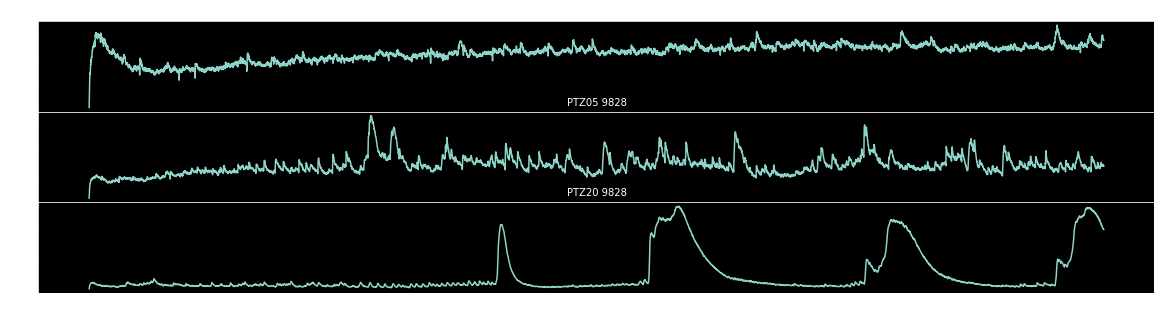

In [3]:
# PLOT - average whole brain fluorescence
#----------------------------------------
deltalist = sorted(glob.glob('*E-12*deltaff.npy'))
f, axarr = plt.subplots(3,1,sharey=False, sharex=False, figsize = (20,5))
f.subplots_adjust(hspace=0)
for i in range(len(deltalist)):
    me = np.load(deltalist[i])
    axarr[i].set_title(deltalist[i][deltalist[i].find('dpf')+4:deltalist[i].find('run')-1] + ' ' + str(me.shape[1]), size = 10)
    new = np.apply_along_axis(np.mean, 0, me)
    axarr[i].plot(new)

plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


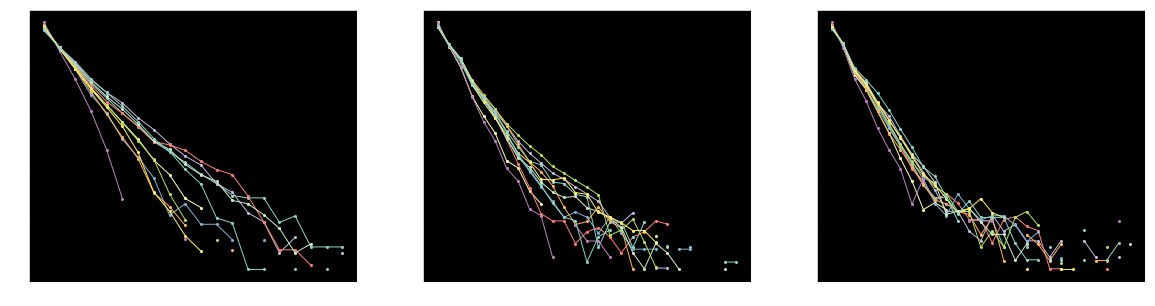

In [4]:
f, axarr = plt.subplots(1,3,sharey=False, sharex=False, figsize = (20,5))
f.subplots_adjust(hspace=0)

for t in range(len(comblist)):
    nowlist = comblist[t]
    
    newvec = []
    for i in range(len(nowlist)):
        newvec = np.append(newvec, np.load(nowlist[i]))
    mini = np.min(newvec)
    maxi = np.max(newvec)

    for i in range(len(nowlist)):
        avdistcut = np.load(nowlist[i])
        binned=np.logspace(np.log10(mini),np.log10(maxi), 30)
        hist = np.histogram(avdistcut, bins = binned)
        xaxis = np.log10(hist[1][:-1])
        yaxis = np.log10(hist[0]/np.sum(hist[0]))
        axarr[t].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o-', linewidth = 1, markersize = 2)

plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


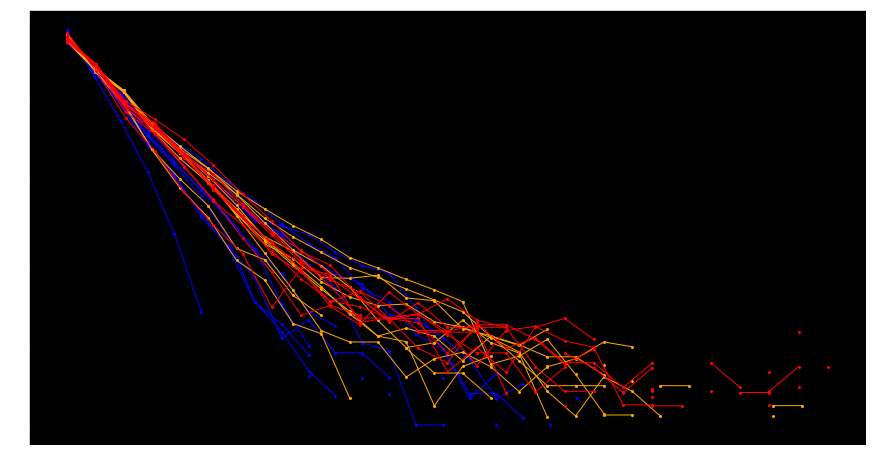

In [4]:
f, axarr = plt.subplots(figsize = (15,8))
for t in range(len(comblist)):
    nowlist = comblist[t]
    colist = ['blue', 'orange', 'red']
    
    newvec = []
    for i in range(len(nowlist)):
        newvec = np.append(newvec, np.load(nowlist[i]))
    mini = np.min(newvec)
    maxi = np.max(newvec)

    
    for i in range(len(nowlist)):
        avdistcut = np.load(nowlist[i])
        binned=np.logspace(np.log10(mini),np.log10(maxi), 30)
        hist = np.histogram(avdistcut, bins = binned)
        xaxis = np.log10(hist[1][:-1])
        yaxis = np.log10(hist[0]/np.sum(hist[0]))
        plt.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o-', linewidth = 1, markersize = 2, color = colist[t])

plt.show()


In [21]:
singlelist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_newavsizelist.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_newavsizelist.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_newavsizelist.npy']

PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_newavsizelist.npy
PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_newavsizelist.npy
PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_newavsizelist.npy


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


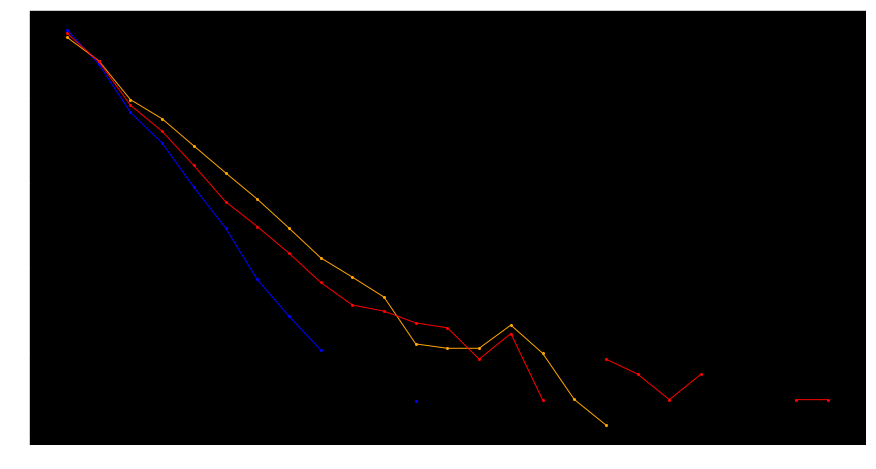

In [9]:
pick = 4
singlelist = [BLNsizelist[pick], P5sizelist[pick], P20sizelist[pick]]
colist = ['blue', 'orange', 'red']

f, axarr = plt.subplots(figsize = (15,8))

for t in range(len(singlelist)):
    newvec = np.append(newvec, np.load(singlelist[t]))
mini = np.min(newvec)
maxi = np.max(newvec)
    
for t in range(len(singlelist)):
    avdistcut = np.load(singlelist[t])
    binned=np.logspace(np.log10(mini),np.log10(maxi), 30)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    plt.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], 'o-', linewidth = 1, markersize = 2, color = colist[t])
    print(singlelist[t])

plt.show()


